# install code dependencies 

In [1]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!pip install jupyter-contrib-nbextensions

'c:\Program' is not recognized as an internal or external command,
operable program or batch file.


Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install ydata-profiling efficient-apriori

Defaulting to user installation because normal site-packages is not writeable


# Read & Preview the dataset

In [3]:
import os 
import numpy as np 
import pandas as pd 
from dotenv import load_dotenv
from datetime import datetime

dataset = pd.read_csv('fifa.csv')
dataset

C:\Users\AsusIran\AppData\Local\Temp\ipykernel_24876\985796320.py:7: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('fifa.csv')


ID               Name                      LongName  \
0      158023           L. Messi                  Lionel Messi   
1       20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2      200389           J. Oblak                     Jan Oblak   
3      192985       K. De Bruyne               Kevin De Bruyne   
4      190871          Neymar Jr    Neymar da Silva Santos Jr.   
...       ...                ...                           ...   
18974  247223             Xia Ao                        Ao Xia   
18975  258760           B. Hough                     Ben Hough   
18976  252757        R. McKinley                Ronan McKinley   
18977  243790       Wang Zhen'ao                  Zhen'ao Wang   
18978  252520          Zhou Xiao                     Xiao Zhou   

                                               photoUrl  \
0      https://cdn.sofifa.com/players/158/023/21_60.png   
1      https://cdn.sofifa.com/players/020/801/21_60.png   
2      https://cdn.sofifa.com/players/200/389/21_60.png   
3      https://cdn.sofifa.com/players/192/985/21_60.png   
4      https://cdn.sofifa.com/players/190/871/21_60.png   
...                                                 ...   
18974  https://cdn.sofifa.com/players/247/223/21_60.png   
18975  https://cdn.sofifa.com/players/258/760/21_60.png   
18976  https://cdn.sofifa.com/players/252/757/21_60.png   
18977  https://cdn.sofifa.com/players/243/790/21_60.png   
18978  https://cdn.sofifa.com/players/252/520/21_60.png   

                                               playerUrl Nationality  Age  \
0      http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33   
1      http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35   
2      http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27   
3      http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29   
4      http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28   
...                                                  ...         ...  ...   
18974     http://sofifa.com/player/247223/ao-xia/210006/    China PR   21   
18975  http://sofifa.com/player/258760/ben-hough/210006/     England   17   
18976  http://sofifa.com/player/252757/ronan-mckinley...     England   18   
18977  http://sofifa.com/player/243790/zhenao-wang/21...    China PR   20   
18978  http://sofifa.com/player/252520/xiao-zhou/210006/    China PR   21   

       ↓OVA  POT                         Club  ...     A/W     D/W   IR PAC  \
0        93   93         \n\n\n\nFC Barcelona  ...  Medium     Low  5 ★  85   
1        92   92             \n\n\n\nJuventus  ...    High     Low  5 ★  89   
2        91   93      \n\n\n\nAtlético Madrid  ...  Medium  Medium  3 ★  87   
3        91   91      \n\n\n\nManchester City  ...    High    High  4 ★  76   
4        91   91  \n\n\n\nParis Saint-Germain  ...    High  Medium  5 ★  91   
...     ...  ...                          ...  ...     ...     ...  ...  ..   
18974    47   55           \n\n\n\nWuhan Zall  ...  Medium  Medium  1 ★  64   
18975    47   67      \n\n\n\nOldham Athletic  ...  Medium  Medium  1 ★  64   
18976    47   65           \n\n\n\nDerry City  ...  Medium  Medium  1 ★  63   
18977    47   57     \n\n\n\nDalian YiFang FC  ...  Medium  Medium  1 ★  58   
18978    47   57     \n\n\n\nDalian YiFang FC  ...  Medium  Medium  1 ★  62   

      SHO  PAS DRI DEF PHY Hits  
0      92   91  95  38  65  771  
1      93   81  89  35  77  562  
2      92   78  90  52  90  150  
3      86   93  88  64  78  207  
4      85   86  94  36  59  595  
...    ..  ...  ..  ..  ..  ...  
18974  28   26  38  48  51  NaN  
18975  40   48  49  35  45  NaN  
18976  39   44  46  40  53  NaN  
18977  49   41  49  30  44  NaN  
18978  22   39  42  45  55  NaN  

[18979 rows x 77 columns]

# Columns Description 

## General Information
- **ID**: A unique identifier for each player in the dataset.
- **Name**: The player's commonly known name.
- **LongName**: The player's full name, including first and last name.
- **photoUrl**: The URL to the player's photo.
- **playerUrl**: The URL to the player's detailed profile or page.
- **Nationality**: The country the player represents in international football.
- **Age**: The player's age.

## Attributes and Performance Metrics
- **↓OVA**: Overall rating (OVA) of the player, summarizing their overall skill level.
- **POT**: Potential rating, indicating the player's maximum possible rating.
- **Club**: The name of the club the player currently plays for.
- **Contract**: Details about the player's contract duration with their current club.
- **Positions**: The various positions the player can play on the field (e.g., ST, CAM, LB).
- **Height**: The player's height, typically measured in centimeters or feet/inches.
- **Weight**: The player's weight, typically measured in kilograms or pounds.
- **Preferred Foot**: The player's dominant foot (e.g., right or left).
- **BOV**: Best overall rating the player can achieve in their preferred position.
- **Best Position**: The position where the player performs best.
- **Joined**: The date the player joined their current club.
- **Loan Date End**: The end date of the player's loan period if they are on loan.

## Financials
- **Value**: The estimated market value of the player.
- **Wage**: The weekly salary of the player.
- **Release Clause**: The amount required to release the player from their contract.

## Skill Ratings
- **Attacking**: Summary of the player's attacking attributes.
- **Crossing**: The player's ability to deliver accurate crosses.
- **Finishing**: The player's ability to finish goal-scoring opportunities.
- **Heading Accuracy**: The accuracy of the player's headers.
- **Short Passing**: The player's skill in short passes.
- **Volleys**: The player's ability to strike volleys.
- **Skill**: Summary of technical skills.
- **Dribbling**: The player's dribbling ability.
- **Curve**: The player's ability to bend the ball during shots or passes.
- **FK Accuracy**: The accuracy of the player's free kicks.
- **Long Passing**: The player's skill in long-range passes.
- **Ball Control**: The player's control over the ball during possession.

## Physical and Mental Attributes
- **Movement**: Summary of movement-related attributes.
- **Acceleration**: The player's ability to reach top speed quickly.
- **Sprint Speed**: The player's top speed.
- **Agility**: The player's ability to change direction quickly.
- **Reactions**: The player's responsiveness to in-game situations.
- **Balance**: The player's ability to maintain balance under pressure.
- **Power**: Summary of strength-related attributes.
- **Shot Power**: The power behind the player's shots.
- **Jumping**: The player's ability to jump.
- **Stamina**: The player's ability to sustain performance over the match.
- **Strength**: The player's physical strength.
- **Long Shots**: The player's ability to shoot accurately from long distances.
- **Mentality**: Summary of mental attributes.
- **Aggression**: The player's level of aggression.
- **Interceptions**: The player's ability to intercept passes.
- **Positioning**: The player's ability to position themselves effectively during play.
- **Vision**: The player's ability to spot opportunities for passes or shots.
- **Penalties**: The player's ability to take penalties.
- **Composure**: The player's ability to stay calm under pressure.

## Defending and Goalkeeping
- **Defending**: Summary of defensive attributes.
- **Marking**: The player's ability to mark opponents.
- **Standing Tackle**: The player's skill in standing tackles.
- **Sliding Tackle**: The player's skill in sliding tackles.
- **Goalkeeping**: Summary of goalkeeping attributes.
- **GK Diving**: The goalkeeper's diving ability.
- **GK Handling**: The goalkeeper's ability to handle the ball.
- **GK Kicking**: The goalkeeper's skill in kicking the ball.
- **GK Positioning**: The goalkeeper's positioning skills.
- **GK Reflexes**: The goalkeeper's reflexes.

## Statistics and Miscellaneous
- **Total Stats**: The total of all the player's stats.
- **Base Stats**: The sum of key stats relevant to the player's position.
- **W/F**: Weak foot rating, representing how effective the player is with their non-dominant foot.
- **SM**: Skill moves rating, indicating the player's ability to perform advanced dribbling moves.
- **A/W**: Attacking work rate (e.g., Low, Medium, High).
- **D/W**: Defensive work rate (e.g., Low, Medium, High).
- **IR**: International reputation, showing the player's global recognition.
- **PAC**: Pace rating, summarizing acceleration and sprint speed.
- **SHO**: Shooting rating, summarizing shot power, finishing, and long shots.
- **PAS**: Passing rating, summarizing short passing, long passing, and vision.
- **DRI**: Dribbling rating, summarizing dribbling, agility, and ball control.
- **DEF**: Defending rating, summarizing marking, tackling, and interceptions.
- **PHY**: Physical rating, summarizing strength, stamina, and jumping.
- **Hits**: Likely represents the popularity or number of times a player's profile has been viewed.


# Some Initial Insights Of the Dataset  

In [4]:
#print in a nice format all the information about the dataset needed know 
print("The dataset has the following columns: ")
print(dataset.columns)
print("\n")
print("The dataset has the following shape: ")
print(dataset.shape)
print("\n")
print("The dataset has the following datatypes: ")
print(dataset.dtypes)
print("\n")
print("The dataset has the following missing values: ")
print(dataset.isnull().sum())
print("\n")
print("The dataset has the following unique values: ")
print(dataset.nunique())
print("\n")
print("The dataset has the following statistics: ")
print(dataset.describe())
print("\n")
print("The dataset has the following information: ")
print(dataset.info())
print("\n")
print("The dataset has the following number of duplicates: ")
print(dataset.duplicated().sum())




The dataset has the following columns: 
Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'P

In [5]:
dataset.describe()

ID           Age          ↓OVA           POT           BOV  \
count   18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean   226403.384794     25.194109     65.718636     71.136414     66.751726   
std     27141.054157      4.710520      6.968999      6.114635      6.747193   
min        41.000000     16.000000     47.000000     47.000000     48.000000   
25%    210135.000000     21.000000     61.000000     67.000000     62.000000   
50%    232418.000000     25.000000     66.000000     71.000000     67.000000   
75%    246922.500000     29.000000     70.000000     75.000000     71.000000   
max    259216.000000     53.000000     93.000000     95.000000     93.000000   

          Attacking      Crossing     Finishing  Heading Accuracy  \
count  18979.000000  18979.000000  18979.000000      18979.000000   
mean     248.938142     49.688392     45.842405         51.942726   
std       74.299428     18.131153     19.567081         17.294409   
min       42.000000      6.000000      3.000000          5.000000   
25%      222.000000     38.000000     30.000000         44.000000   
50%      263.000000     54.000000     49.000000         55.000000   
75%      297.000000     63.000000     62.000000         64.000000   
max      437.000000     94.000000     95.000000         93.000000   

       Short Passing  ...  GK Positioning   GK Reflexes   Total Stats  \
count   18979.000000  ...    18979.000000  18979.000000  18979.000000   
mean       58.768112  ...       16.217187     16.519627   1595.286949   
std        14.519106  ...       17.002239     17.854079    269.874789   
min         7.000000  ...        2.000000      2.000000    747.000000   
25%        54.000000  ...        8.000000      8.000000   1452.000000   
50%        62.000000  ...       11.000000     11.000000   1627.000000   
75%        68.000000  ...       14.000000     14.000000   1781.000000   
max        94.000000  ...       91.000000     90.000000   2316.000000   

         Base Stats           PAC           SHO           PAS           DRI  \
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean     355.702197     67.453975     53.457031     57.681016     62.875020   
std       40.761117     10.677859     13.827425     10.081857      9.927415   
min      232.000000     25.000000     16.000000     25.000000     25.000000   
25%      327.000000     61.000000     44.000000     51.000000     57.000000   
50%      356.000000     68.000000     56.000000     58.000000     64.000000   
75%      384.000000     75.000000     64.000000     64.000000     69.000000   
max      498.000000     96.000000     93.000000     93.000000     95.000000   

                DEF           PHY  
count  18979.000000  18979.000000  
mean      49.866221     64.368934  
std       16.443213      9.601883  
min       12.000000     28.000000  
25%       35.000000     58.000000  
50%       53.000000     65.000000  
75%       63.000000     71.000000  
max       91.000000     91.000000  

[8 rows x 54 columns]

# Data Quality Assessment

In [79]:
#Completeness 
null_cnt= dataset.isnull().sum().sum()
not_null_cnt = dataset.notnull().sum().sum()
total_cnt = dataset.size
print("The dataset has a total of {} missing values".format(null_cnt))
print("The dataset has a total of {} non missing values".format(not_null_cnt))
print("The dataset has a total of {} values".format(total_cnt))

completeness = not_null_cnt/total_cnt
completeness = '{0:.1f}%'.format(completeness*100)
print("Completeness Evaluation: "+completeness)

#Uniqueness
unique_cnt = dataset.nunique().sum()
print("The dataset has a total of {} unique values".format(unique_cnt))
uniqueness = unique_cnt/total_cnt
uniqueness = '{0:.1f}%'.format(uniqueness*100)
print("Uniqueness Evaluation: "+ uniqueness)

#Consistency
consistenciness = unique_cnt / not_null_cnt
consistenciness = '{0:.1f}%'.format(consistenciness*100)
print("Consistenciness Evaluation: "+ consistenciness)

# Timeliness
VOLATILITY = 100  # Days
today = datetime(2025, 1, 17)  
dataset['Joined'] = pd.to_datetime( dataset['Joined'], errors='coerce')
dataset['Currency'] =(today - dataset['Joined']).dt.days
dataset['Timeliness'] = np.where(
    VOLATILITY > dataset['Currency'],  
    1 - ( dataset['Currency'] / VOLATILITY),  
    0  
)
print("Average Timeliness:", dataset['Timeliness'].mean())
print("Maximum Timeliness:",  dataset['Timeliness'].max())
print("Minimum Timeliness:",  dataset['Timeliness'].min())

dataset.to_csv('fifa_data_with_timeliness.csv', index=False)
dataset


The dataset has a total of 0 missing values
The dataset has a total of 1861545 non missing values
The dataset has a total of 1861545 values
Completeness Evaluation: 100.0%
The dataset has a total of 13651 unique values
Uniqueness Evaluation: 0.7%
Consistenciness Evaluation: 0.7%
Average Timeliness: 0.0
Maximum Timeliness: 0.0
Minimum Timeliness: 0.0


Nationality  Age  OVA  POT                 Club  Height  Weight  \
0       Argentina   33   93   93         FC Barcelona     170      72   
1        Portugal   35   92   92             Juventus     187      83   
2        Slovenia   27   91   93      Atlético Madrid     188      87   
3         Belgium   29   91   91      Manchester City     181      70   
4          Brazil   28   91   91  Paris Saint-Germain     175      68   
...           ...  ...  ...  ...                  ...     ...     ...   
18974    China PR   21   47   55           Wuhan Zall     178      66   
18975     England   17   47   67      Oldham Athletic     175      65   
18976     England   18   47   65           Derry City     179      74   
18977    China PR   20   47   57     Dalian YiFang FC     175      69   
18978    China PR   21   47   57     Dalian YiFang FC     188      75   

       Preferred Foot  BOV     Joined  ...  Best_Position_RWB  \
0                   0   93 2004-07-01  ...              False   
1                   1   92 2018-07-10  ...              False   
2                   1   91 2014-07-16  ...              False   
3                   1   91 2015-08-30  ...              False   
4                   1   91 2017-08-03  ...              False   
...               ...  ...        ...  ...                ...   
18974               1   49 2018-07-13  ...              False   
18975               1   51 2020-08-01  ...              False   
18976               1   49 2019-03-08  ...              False   
18977               1   48 2020-09-22  ...              False   
18978               0   50 2019-07-29  ...              False   

       Best_Position_ST  A/W_High  A/W_Low  A/W_Medium  D/W_High  D/W_Low  \
0                 False         0        0           1         0        1   
1                  True         1        0           0         0        1   
2                 False         0        0           1         0        0   
3                 False         1        0           0         1        0   
4                 False         1        0           0         0        0   
...                 ...       ...      ...         ...       ...      ...   
18974             False         0        0           1         0        0   
18975             False         0        0           1         0        0   
18976             False         0        0           1         0        0   
18977              True         0        0           1         0        0   
18978             False         0        0           1         0        0   

       D/W_Medium  Currency  Timeliness  
0               0      7505         0.0  
1               0      2383         0.0  
2               1      3838         0.0  
3               0      3428         0.0  
4               1      2724         0.0  
...           ...       ...         ...  
18974           1      2380         0.0  
18975           1      1630         0.0  
18976           1      2142         0.0  
18977           1      1578         0.0  
18978           1      1999         0.0  

[17729 rows x 105 columns]

# Data Profiling 

In [7]:
from ydata_profiling import ProfileReport

PROFILE = ProfileReport(dataset, title="Profiling Report")


C:\Users\AsusIran\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
PROFILE.to_file("fifa_profiling.html")

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\AsusIran\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from current font.
  plt.savefig(
C:\Users\AsusIran\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from current font.
  plt.savefig(
C:\Users\AsusIran\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from current font.
  plt.savefig(
Export report to file: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


In [67]:
dataset.shape[0]

17729

In [68]:
dataset.shape[1]

103

# Correlation of the Numerical Features 

In [9]:
#select the columns that are numerical
numerical_columns = dataset.select_dtypes(include=[np.number]).columns
print("The numerical columns are: ")
print(numerical_columns) 


The numerical columns are: 
Index(['ID', 'Age', '↓OVA', 'POT', 'BOV', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')


In [10]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# select the style from fivethityeight website
plt.style.use('fivethirtyeight') 
mpl.rcParams['lines.linewidth'] = 2

# predefined figsize
figsize=(12,12)

import warnings
warnings.filterwarnings('ignore')



%config InlineBackend.figure_format = 'png'
%matplotlib inline

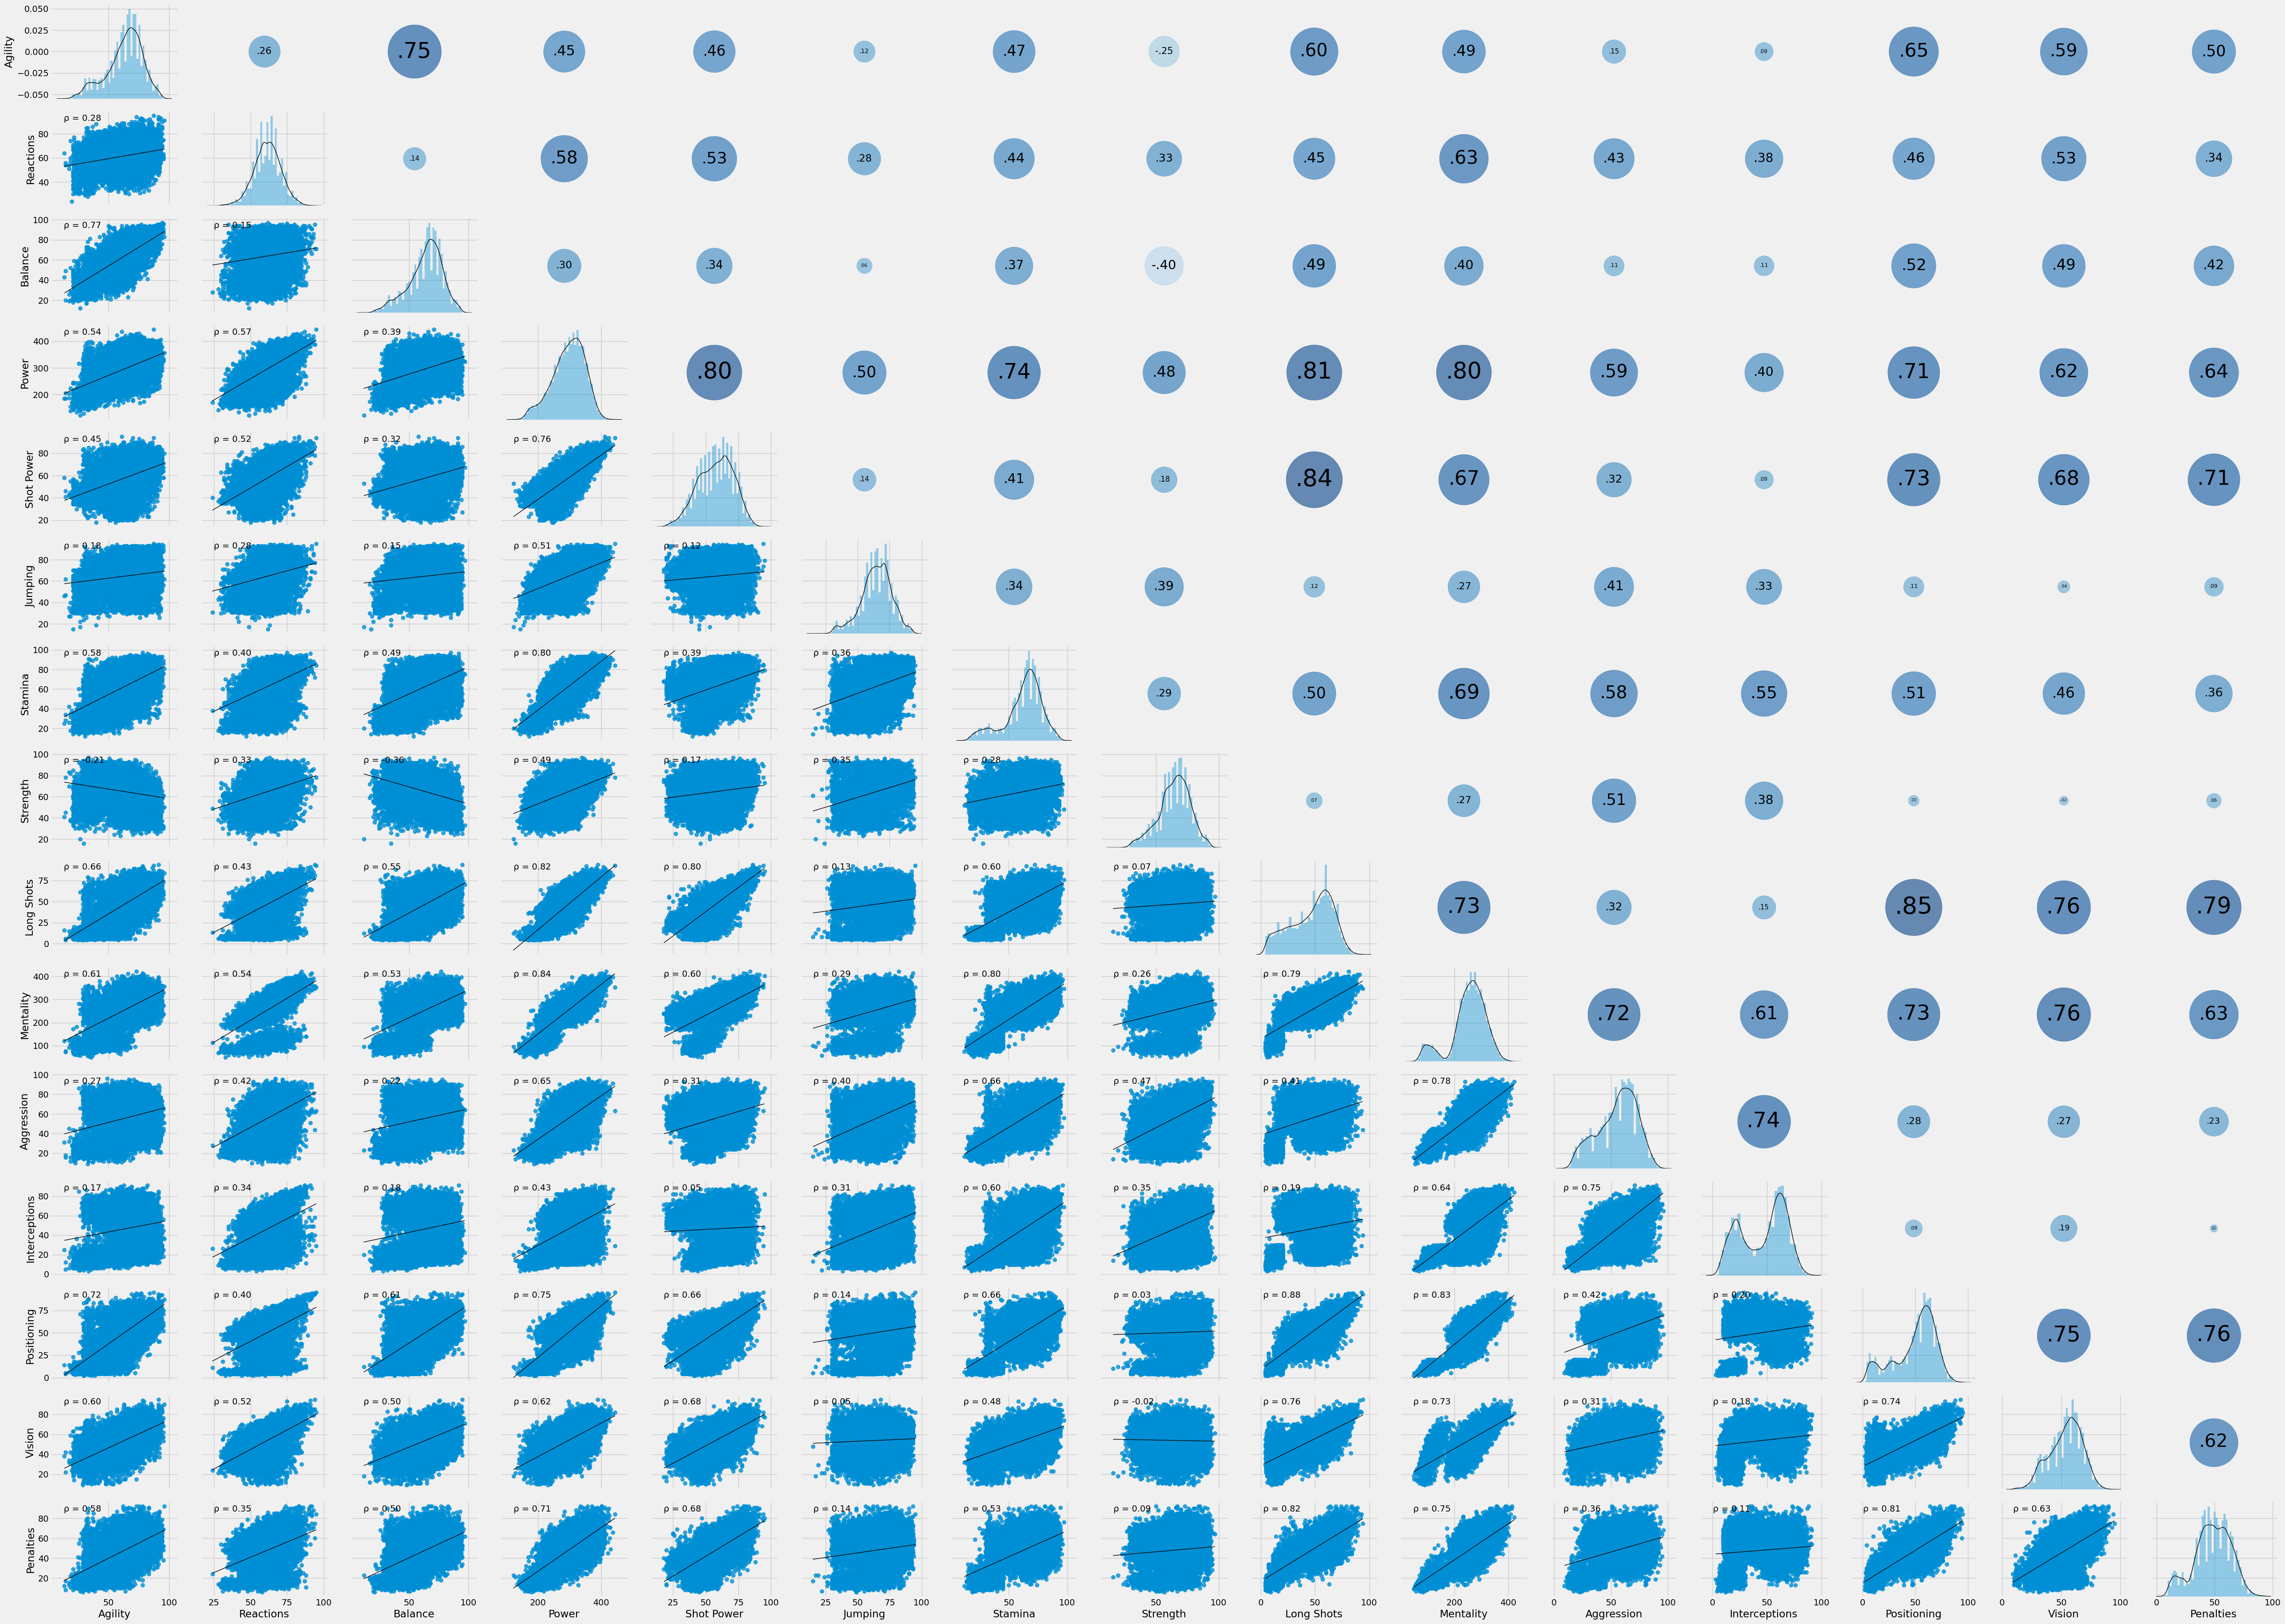

<Figure size 2000x2000 with 0 Axes>

In [11]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)    
    
# g = sns.pairplot(stocks,palette=["Blues_d"])

def plot_corr(dataset : pd.DataFrame , numerical_columns : list): 
    g = sns.PairGrid(dataset[numerical_columns], aspect=1.4, diag_sharey=False)
    g.map_lower(corrfunc)
    g.map_lower(sns.regplot,  ci=False, line_kws={'color': 'Black','linewidth':1})
    g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
    g.map_upper(corrdot)
    plt.figure(figsize=(20, 20))
    plt.show()


#select at most 15 numerical columns to plot the correlation matrix, more columns will take too long to compute and the plot will be too crowded
plot_corr(dataset, numerical_columns[20:35])


# Data Cleaning (Missing value)

In [12]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Axes: >

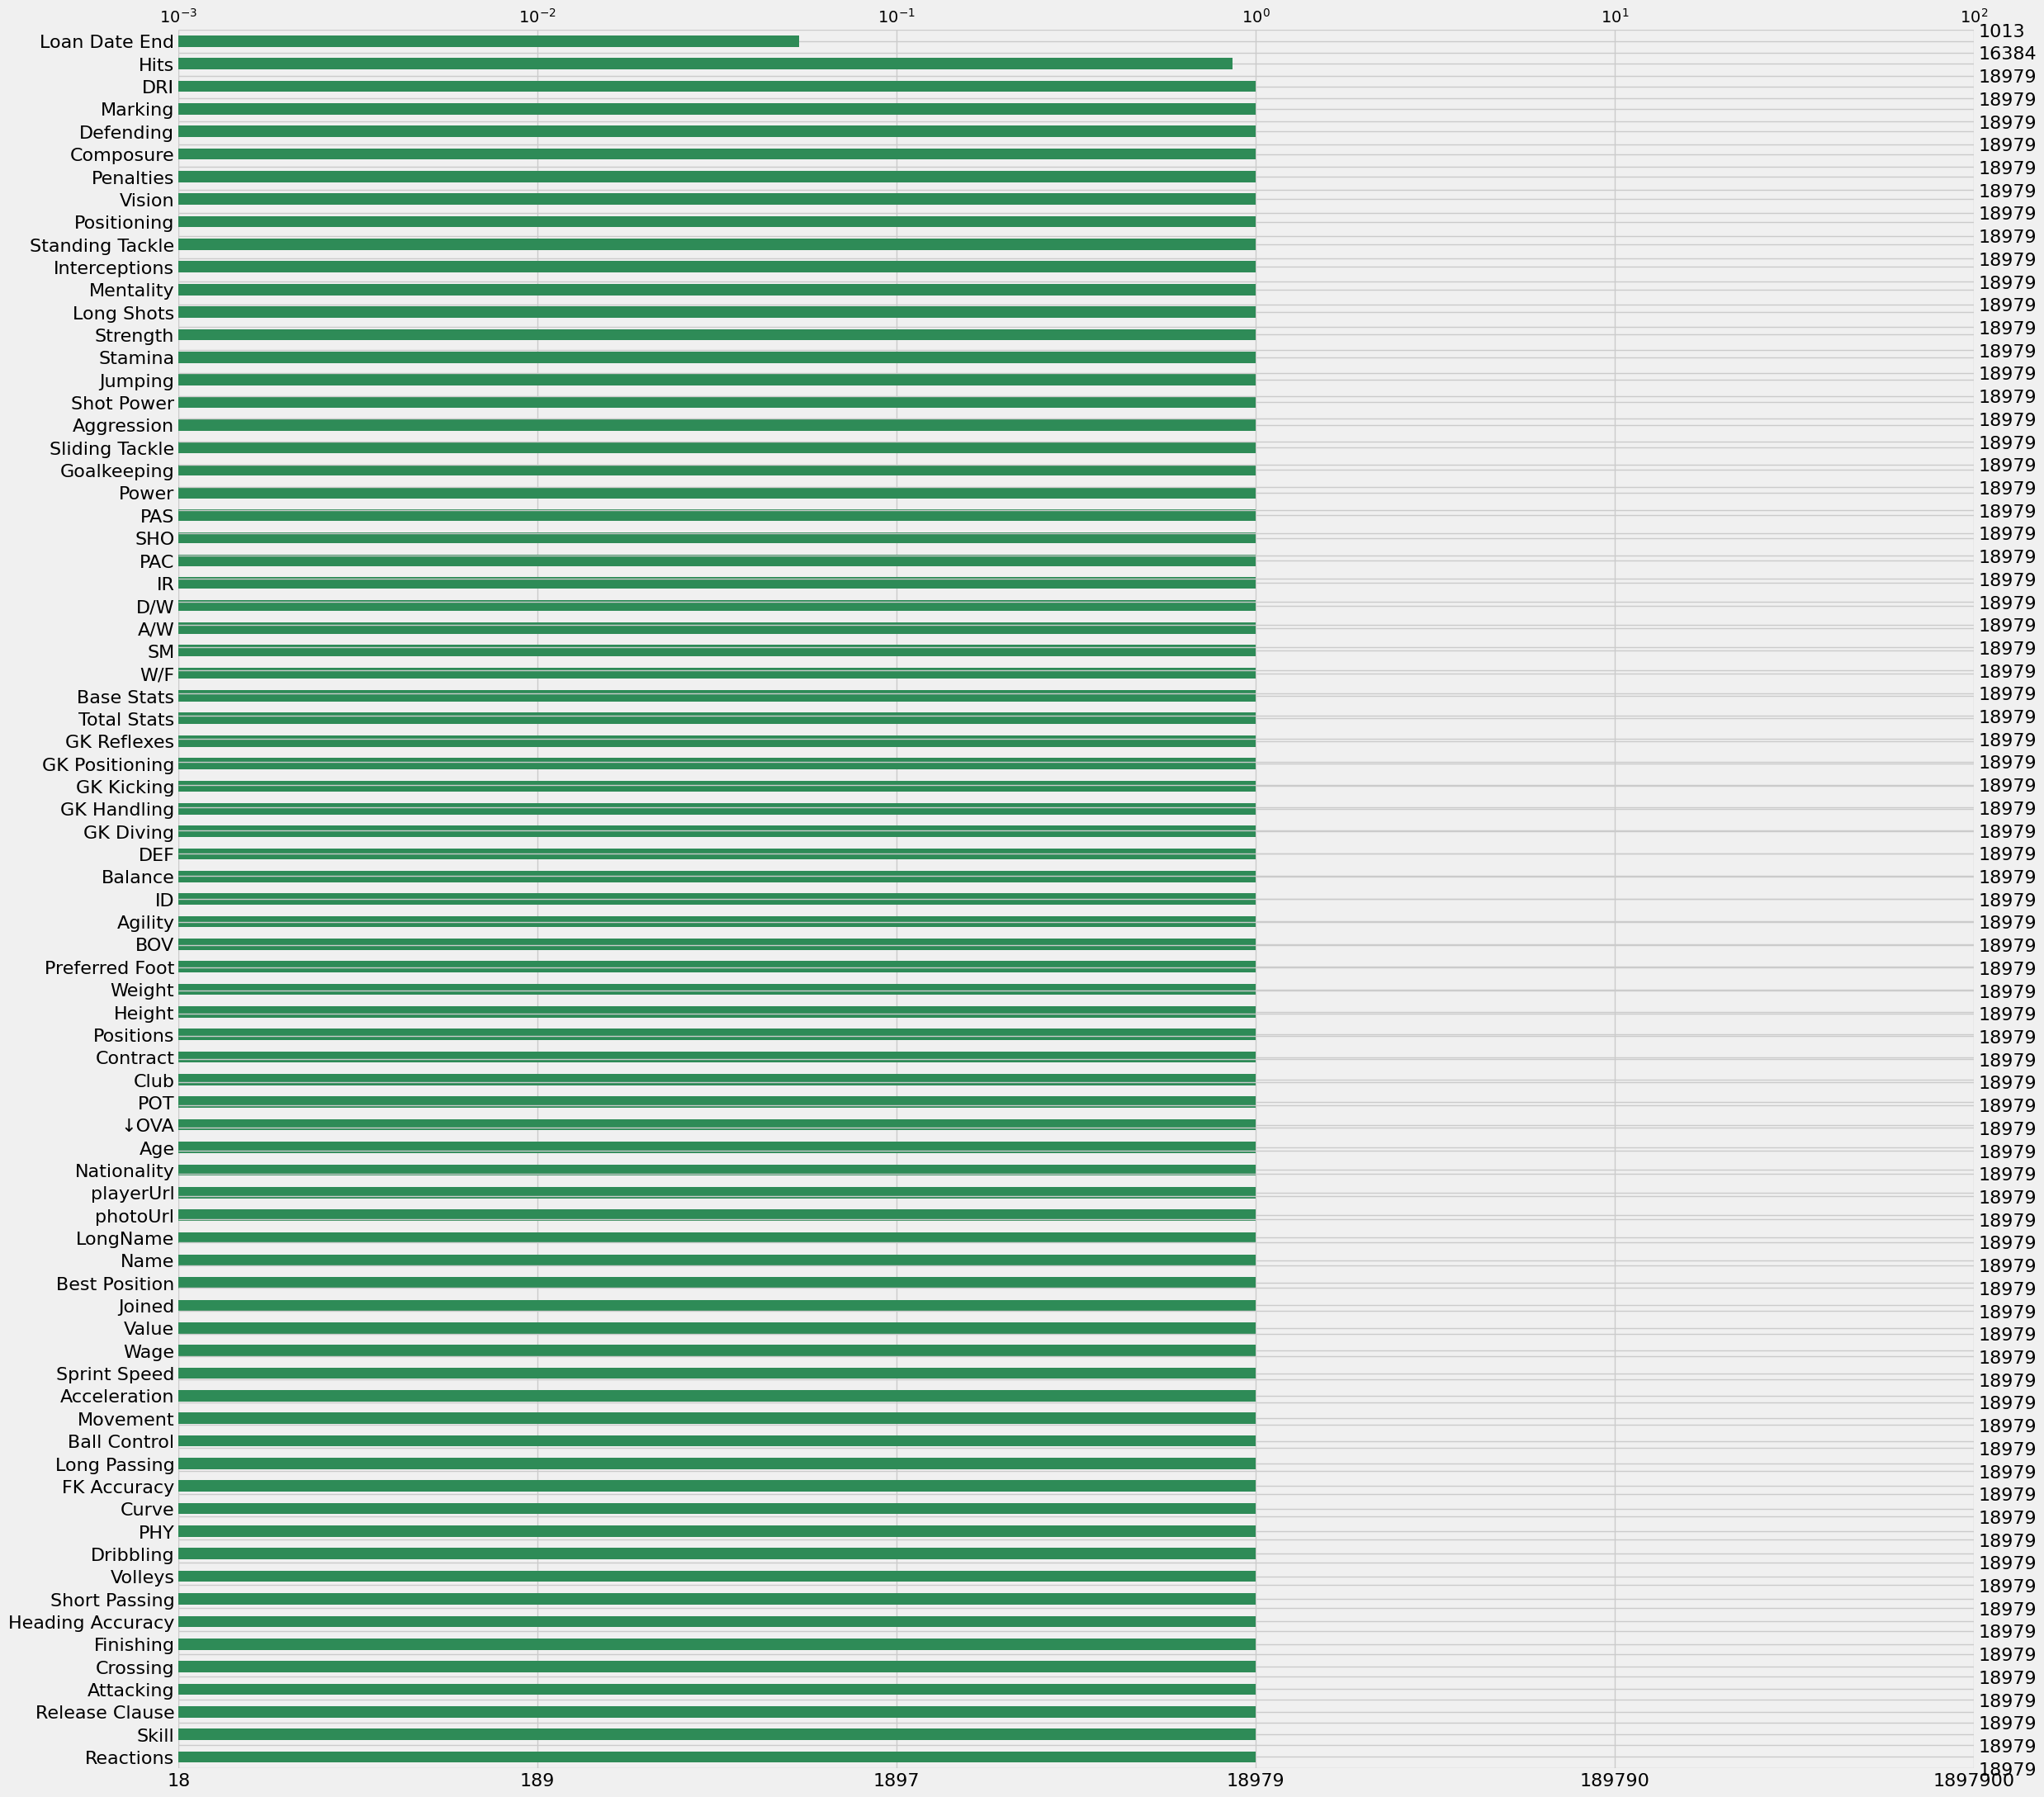

In [13]:
import missingno as msno
msno.bar(dataset, color="seagreen", log=True, sort="descending")

In [14]:
{col: [dataset[col].isnull().sum(), f'% {np.round(np.mean(dataset[col].isnull()*100), 3)}'
      ] for col in dataset.columns if dataset[col].isnull().any()}

{'Loan Date End': [17966, '% 94.663'], 'Hits': [2595, '% 13.673']}

# Data Cleaning (Data Transformation)


- Due to the presence of missing values in the 'Loan Date End' and 'Hits' columns, we will remove these columns.
- The footballer's photo link and the link related to a player are not useful for following downstream analysis tasks.
- the columns 'ID' , 'Name', 'FullName' are dropped since they are not informative for any following downstream analysis.



In [15]:
columnsdrop = ['photoUrl','playerUrl','Loan Date End', 'Hits', 'ID' , 'Name' , 'LongName']
dataset = dataset.drop(columns = columnsdrop)

#Remove any white spaces in the values of the dataset
dataset = dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Convert the "↓OVA" column to "OVA" (rename for simplicity)
dataset.rename(columns={"↓OVA": "OVA"}, inplace=True)
dataset.rename(columns={'LongName':'FullName'},inplace=True)

In [16]:
# Clean financial columns ('Value', 'Wage')
# Convert Value and Wage to numeric values in millions
def convert_money(value):
    value = str(value).replace("€", "").strip()
    if "M" in str(value):
        value = str(value).replace("M", "").strip()
        return float(value) * 1_000_000  # Convert millions to full number
    elif "K" in str(value):
        value = str(value).replace("K", "").strip()
        return float(value) * 1_000      # Convert thousands to full number
    else:
        return float(value) if value else 0

dataset["Value"] = dataset["Value"].apply(convert_money)
dataset["Wage"] = dataset["Wage"].apply(convert_money)
dataset['Release Clause'] = dataset['Release Clause'].apply(convert_money)
dataset[["Wage" , "Value", 'Release Clause']].head()


Wage        Value  Release Clause
0  560000.0  103500000.0     138400000.0
1  220000.0   63000000.0      75900000.0
2  125000.0  120000000.0     159400000.0
3  370000.0  129000000.0     161000000.0
4  270000.0  132000000.0     166500000.0

In [17]:
# Function to convert weight to kilograms
def convert_weight_to_kg(weight):
    if 'lbs' in weight:
        return int(float(weight.replace('lbs', '').strip()) * 0.453592)
    elif 'kg' in weight:
        return int(weight.replace('kg', '').strip())
    else:
        return int(weight.strip())

dataset['Weight'] = dataset['Weight'].apply(convert_weight_to_kg)


# Function to convert height values to cm
def convert_height_to_cm(height):
    if 'cm' in height:
        return int(height.replace('cm', ''))  # If it's already in cm, remove 'cm' and convert to integer
    elif "'" in height:
        # Convert feet and inches to cm
        feet, inches = height.split("'")
        feet = int(feet)
        inches = int(inches.replace('"', ''))
        return round(feet * 30.48 + inches * 2.54)  # 1 foot = 30.48 cm, 1 inch = 2.54 cm
    else:
        return None  # Handle any unexpected formats

dataset['Height'] = dataset['Height'].apply(convert_height_to_cm)

dataset[['Height', 'Weight']].head()

Height  Weight
0     170      72
1     187      83
2     188      87
3     181      70
4     175      68

**The follwing columns are not numerical, so they must be checked further for cleaning** : 
- Nationality
- Club
- Contract
- Positions
- Preferred Foot
- Best Position
- Joined
- W/F
- SM
- A/W
- D/W
- IR

In [18]:
obj_columns = dataset.select_dtypes(include=['object']).columns
print(obj_columns)

Index(['Nationality', 'Club', 'Contract', 'Positions', 'Preferred Foot',
       'Best Position', 'Joined', 'W/F', 'SM', 'A/W', 'D/W', 'IR'],
      dtype='object')


In [19]:
dataset[obj_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nationality     18979 non-null  object
 1   Club            18979 non-null  object
 2   Contract        18979 non-null  object
 3   Positions       18979 non-null  object
 4   Preferred Foot  18979 non-null  object
 5   Best Position   18979 non-null  object
 6   Joined          18979 non-null  object
 7   W/F             18979 non-null  object
 8   SM              18979 non-null  object
 9   A/W             18979 non-null  object
 10  D/W             18979 non-null  object
 11  IR              18979 non-null  object
dtypes: object(12)
memory usage: 1.7+ MB


## Nationality

<Axes: xlabel='Nationality'>

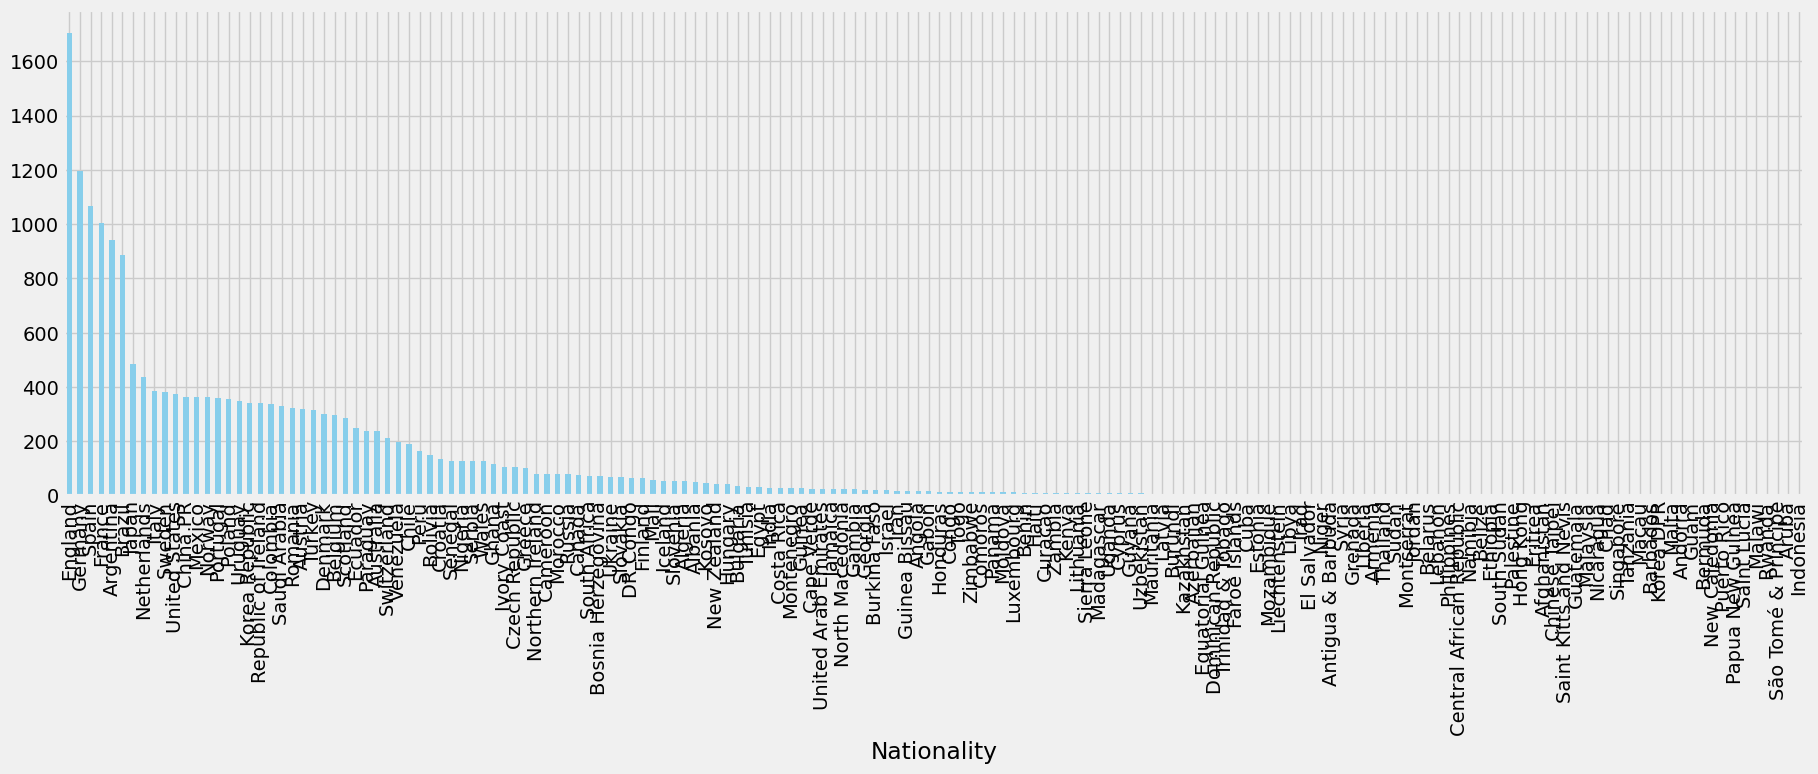

In [20]:
dataset['Nationality'].value_counts().plot(kind='bar', figsize=(20, 6), color='skyblue')

In [21]:
dataset['Nationality'].value_counts()[:10] , dataset['Nationality'].value_counts()[-10:]

(Nationality
 England        1705
 Germany        1195
 Spain          1065
 France         1003
 Argentina       943
 Brazil          887
 Japan           485
 Netherlands     438
 Italy           387
 Sweden          380
 Name: count, dtype: int64,
 Nationality
 Bermuda                1
 New Caledonia          1
 Puerto Rico            1
 Papua New Guinea       1
 Saint Lucia            1
 Malawi                 1
 Rwanda                 1
 São Tomé & Príncipe    1
 Aruba                  1
 Indonesia              1
 Name: count, dtype: int64)

According to the above plot, we conclude that all the values in the 'Nationality' column are valid and consistent. Therefore, no further step for cleaning is required. Since the column values are categorical so, we change the type of the column to ctagorical to help reduce memory usage and make certain operations faster.

In [22]:
dataset['Nationality'] = dataset['Nationality'].astype('category', errors='raise')

## Club

<Axes: xlabel='Club'>

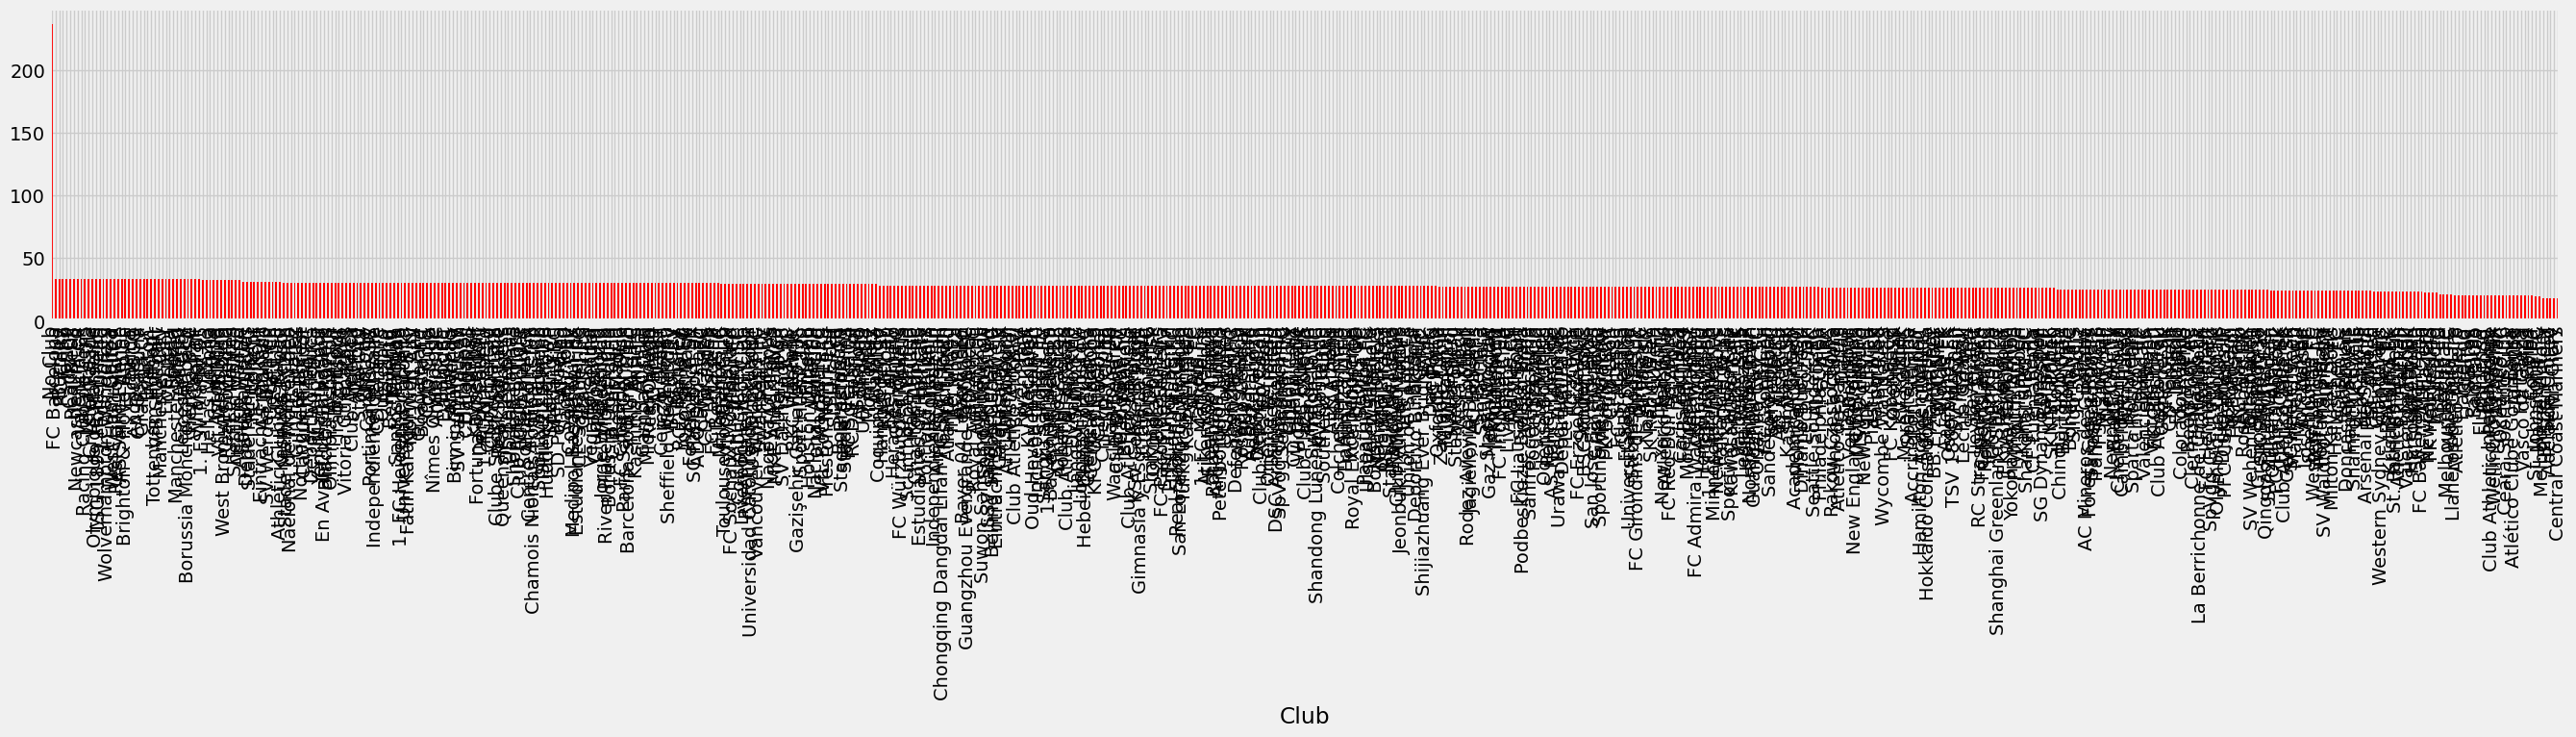

In [23]:
dataset['Club'].value_counts().plot(kind='bar', figsize=(30, 4), color='red')

In [24]:
dataset['Club'].value_counts()[:10] , dataset['Club'].value_counts()[-10:]

(Club
 No Club                237
 FC Barcelona            33
 Burnley                 33
 RC Celta                33
 Torino                  33
 Cádiz CF                33
 Real Betis              33
 Newcastle United        33
 Valencia CF             33
 Racing Club de Lens     33
 Name: count, dtype: int64,
 Club
 Vasco da Gama             20
 Goiás                     20
 Coritiba                  20
 St. Johnstone FC          19
 Macarthur FC              19
 Melbourne Victory         18
 Brisbane Roar             18
 Adelaide United           18
 Perth Glory               18
 Central Coast Mariners    18
 Name: count, dtype: int64)

In [25]:
dataset['Club'] = dataset['Club'].astype('category', errors='raise')

All the explaination mentioned for the 'Nationality' column, are also applied here. 

## Contract

In [26]:
dataset['Contract'].value_counts().shape

(131,)

<Axes: xlabel='Contract'>

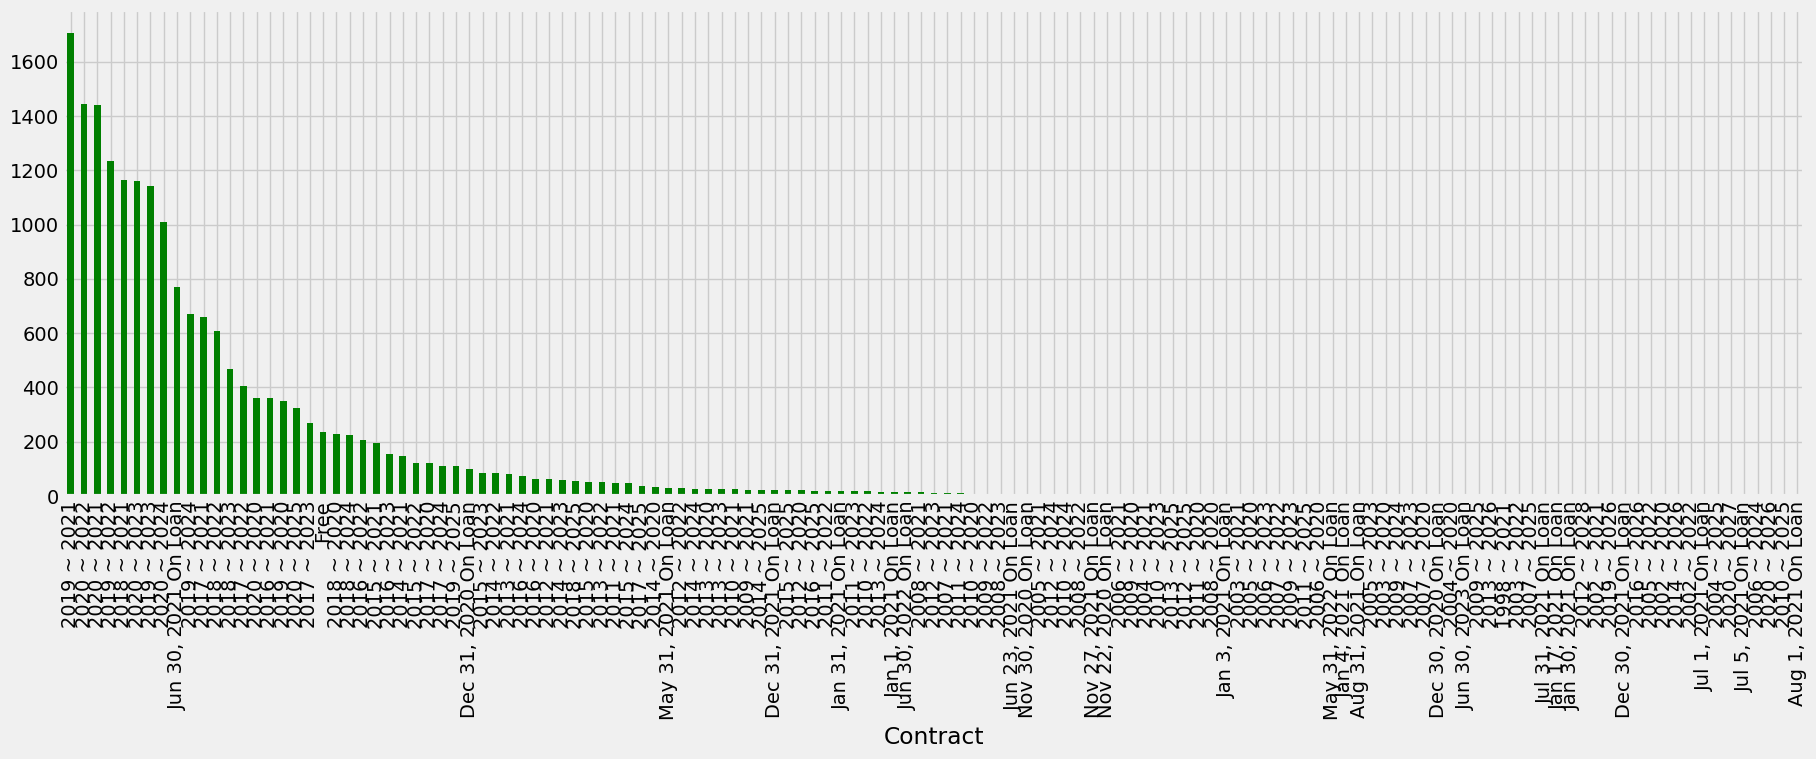

In [27]:
dataset['Contract'].value_counts().plot(kind='bar', figsize=(20, 6), color='green')

As it is observed, some majority of the values of these column are following this pattern : <Start_year ~ End_year>, however, there are some values that are not following the pattern.

In [28]:
# Define a regex pattern:
# ^\d{4}\s*~\s*\d{4}$ means:
# - ^: start of the string
# - \d{4}: 4 digits (for the year)
# - \s*: optional whitespace
# - ~: the tilde character
# - \s*: optional whitespace
# - \d{4}: 4 digits (for the year)
# - $: end of the string
pattern = r'^\d{4}\s*~\s*\d{4}$'

# Identify rows that match the pattern
valid_mask = dataset['Contract'].str.match(pattern, na=False)

# Identify rows that do NOT match the pattern
invalid_mask = ~valid_mask

# Print the invalid rows
invalid_rows = dataset['Contract'][invalid_mask]
print("Invalid 'Contract' values:")
print(invalid_rows)

# count how many invalid rows we have and how many valid rows we have
valid_rows = dataset['Contract'][valid_mask]
invalid_rows = dataset['Contract'][invalid_mask]

print("\n")
print("-------------------------------------------------")
print("\n")

print(f"Number of valid rows: {valid_rows.shape[0]}")
print(f"Number of invalid rows: {invalid_rows.shape[0]}")

# print the percentage of valid rows
valid_percentage = valid_rows.shape[0] / dataset['Contract'].shape[0] * 100
print(f"Percentage of valid rows: {valid_percentage:.2f}%")


Invalid 'Contract' values:
205      Jun 30, 2021 On Loan
248      Jun 30, 2021 On Loan
254      Jun 30, 2021 On Loan
289                      Free
292                      Free
                 ...         
18472    Aug 31, 2021 On Loan
18571    Jun 30, 2021 On Loan
18600    Dec 31, 2020 On Loan
18622    Dec 31, 2020 On Loan
18680    Dec 31, 2020 On Loan
Name: Contract, Length: 1250, dtype: object


-------------------------------------------------


Number of valid rows: 17729
Number of invalid rows: 1250
Percentage of valid rows: 93.41%


In [29]:
#count the number of unique values in the 'Contract' column which are invalid
invalid_values = dataset['Contract'][invalid_mask].unique()
print(f"Number of unique invalid values: {invalid_values.shape[0]}")

#print the unique invalid values in a list format so that each member is printed on a new line

print("Unique invalid values:")
for value in invalid_values:
    print(value)


Number of unique invalid values: 25
Unique invalid values:
Jun 30, 2021 On Loan
Free
Dec 31, 2020 On Loan
Jan 30, 2021 On Loan
Jun 30, 2022 On Loan
May 31, 2021 On Loan
Jul 5, 2021 On Loan
Dec 31, 2021 On Loan
Jul 1, 2021 On Loan
Jan 1, 2021 On Loan
Aug 31, 2021 On Loan
Jan 31, 2021 On Loan
Dec 30, 2021 On Loan
Jun 23, 2021 On Loan
Jan 3, 2021 On Loan
Nov 27, 2021 On Loan
Jan 17, 2021 On Loan
Jun 30, 2023 On Loan
Jul 31, 2021 On Loan
Nov 22, 2020 On Loan
May 31, 2022 On Loan
Dec 30, 2020 On Loan
Jan 4, 2021 On Loan
Nov 30, 2020 On Loan
Aug 1, 2021 On Loan


Since these invalid values are making up a few portion of the dataset, we decide to drop them from the dataset 

In [30]:
#drop the invalid rows from the dataset
dataset = dataset[valid_mask]


Further, we decide to split the 'Contract' column to two columns named : 'Contract_Start' and 'Contract_End'

In [31]:
dataset[['Contract_Start', 'Contract_End']] = dataset['Contract'].str.split('~', expand=True)

# 2. Strip whitespace
dataset['Contract_Start'] = dataset['Contract_Start'].str.strip()
dataset['Contract_End']   = dataset['Contract_End'].str.strip()

# 3. Convert to integers or datetimes, depending on your needs.
# If they are just years, converting to int may suffice:
dataset['Contract_Start'] = dataset['Contract_Start'].astype(int)
dataset['Contract_End']   = dataset['Contract_End'].astype(int)

#drop the 'Contract' column
dataset = dataset.drop(columns=['Contract'])

#check the dataset
dataset[['Contract_Start', 'Contract_End']].head()


Contract_Start  Contract_End
0            2004          2021
1            2018          2022
2            2014          2023
3            2015          2023
4            2017          2022

## Positions

In [32]:
unique_positions = set()
for positions in dataset['Positions'].unique():
    for position in positions.split(","):
        unique_positions.add(position.strip())
        
print("Unique positions:")
for position in sorted(unique_positions):
    print(position)

Unique positions:
CAM
CB
CDM
CF
CM
GK
LB
LM
LW
LWB
RB
RM
RW
RWB
ST


Now, we are aiming to create one columns for each of the above single position so that the value for it is one if the player has the position, otherwise zero(MultiLabelBinarizer). 
We do this to the 'Positions' column, since it makes the dataset more suitable for applying any machine learning algorithm on the dataset.


In [33]:
# Perform one-hot encoding using comma as a separator
positions_encoded = dataset['Positions'].str.get_dummies(sep=', ')

positions_encoded = positions_encoded.rename(columns=lambda c: f'Position_{c}')

position_columns = positions_encoded.columns


dataset = pd.concat([dataset, positions_encoded], axis=1)


In [34]:
#check if the process is done correctly

dataset[position_columns].head()

Position_CAM  Position_CB  Position_CDM  Position_CF  Position_CM  \
0             0            0             0            1            0   
1             0            0             0            0            0   
2             0            0             0            0            0   
3             1            0             0            0            1   
4             1            0             0            0            0   

   Position_GK  Position_LB  Position_LM  Position_LW  Position_LWB  \
0            0            0            0            0             0   
1            0            0            0            1             0   
2            1            0            0            0             0   
3            0            0            0            0             0   
4            0            0            0            1             0   

   Position_RB  Position_RM  Position_RW  Position_RWB  Position_ST  
0            0            0            1             0            1  
1            0            0            0             0            1  
2            0            0            0             0            0  
3            0            0            0             0            0  
4            0            0            0             0            0

In [35]:
dataset['Positions'].head()

0    RW, ST, CF
1        ST, LW
2            GK
3       CAM, CM
4       LW, CAM
Name: Positions, dtype: object

In [36]:
dataset = dataset.drop(columns=['Positions'])

## Preferred Foot

<Axes: xlabel='Preferred Foot'>

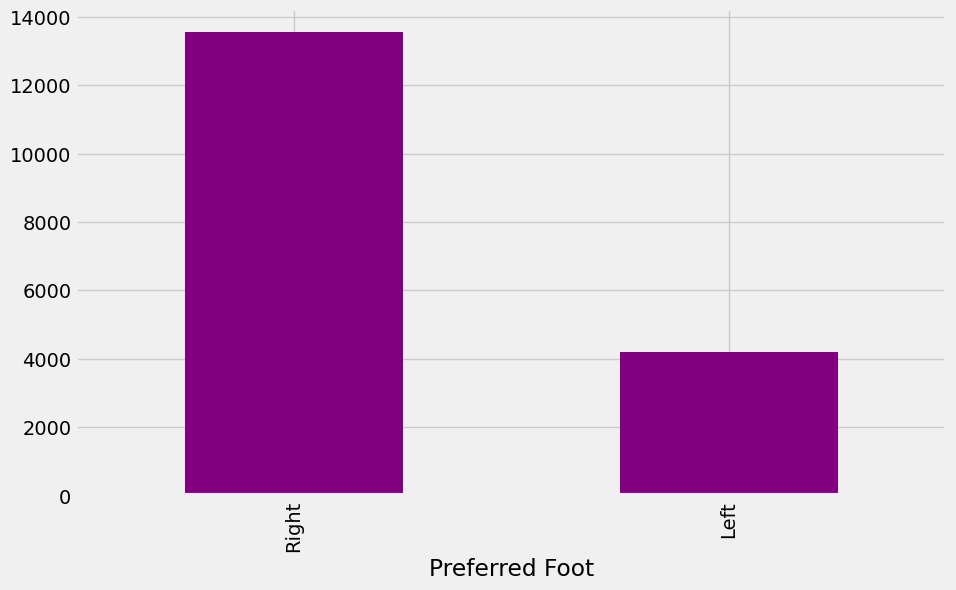

In [37]:
dataset['Preferred Foot'].value_counts().plot(kind='bar', figsize=(10, 6), color='purple')

In [38]:
#Binarize the 'Preferred Foot' column into two categories: 'Left' and 'Right'
dataset['Preferred Foot'] = dataset['Preferred Foot'].map({'Left': 0, 'Right': 1})
dataset['Preferred Foot'].dtype

dtype('int64')

We converted the left value to zero and right to one to have numerical values. 

## Best Position

<Axes: xlabel='Best Position'>

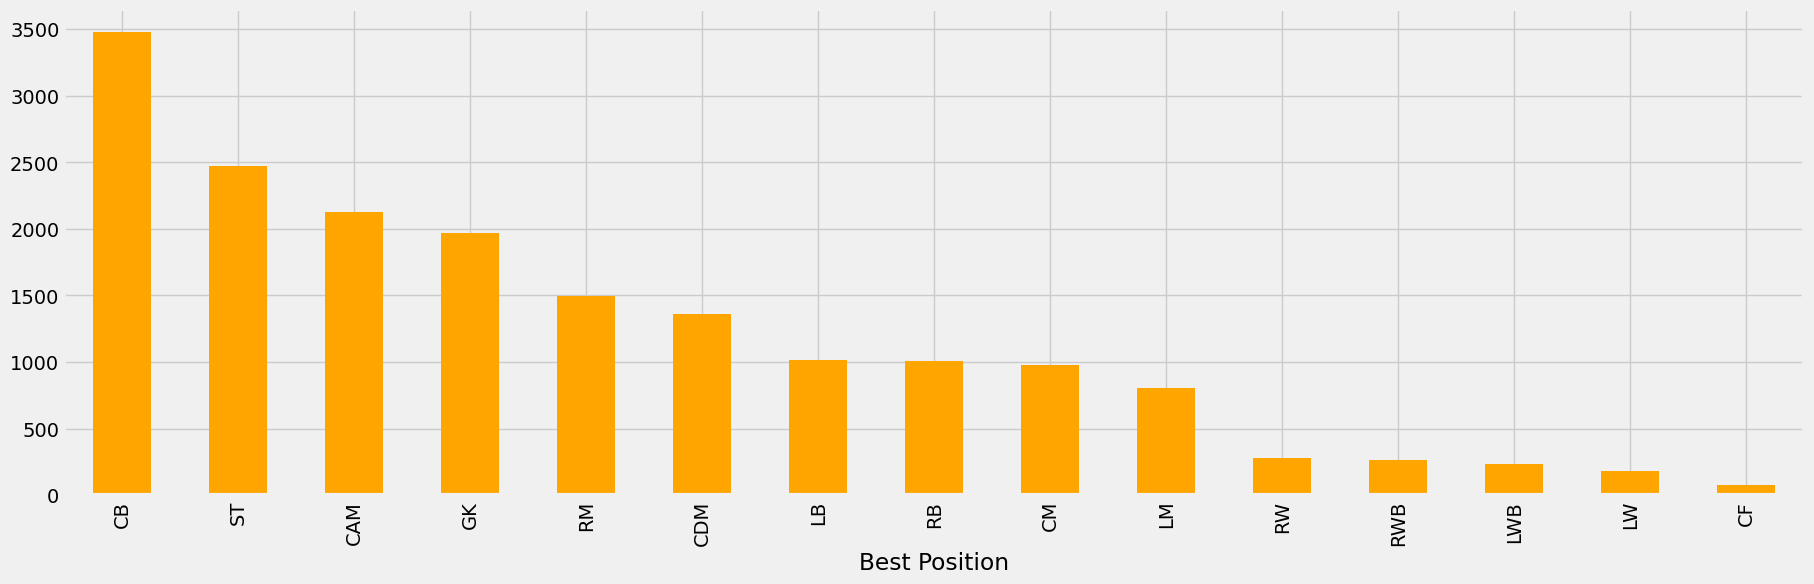

In [39]:
dataset['Best Position'].value_counts().plot(kind='bar', figsize=(20, 6), color='orange')


In [40]:
# check if the column has any row with two values
dataset['Best Position'].str.contains(",").any()

False

In [41]:
# Perform one-hot encoding on the 'Best Position' column
best_position_encoded = pd.get_dummies(dataset['Best Position'], prefix='Best_Position')
best_position_encoded

Best_Position_CAM  Best_Position_CB  Best_Position_CDM  \
0                  False             False              False   
1                  False             False              False   
2                  False             False              False   
3                   True             False              False   
4                  False             False              False   
...                  ...               ...                ...   
18974              False              True              False   
18975               True             False              False   
18976               True             False              False   
18977              False             False              False   
18978              False             False              False   

       Best_Position_CF  Best_Position_CM  Best_Position_GK  Best_Position_LB  \
0                 False             False             False             False   
1                 False             False             False             False   
2                 False             False              True             False   
3                 False             False             False             False   
4                 False             False             False             False   
...                 ...               ...               ...               ...   
18974             False             False             False             False   
18975             False             False             False             False   
18976             False             False             False             False   
18977             False             False             False             False   
18978             False             False             False              True   

       Best_Position_LM  Best_Position_LW  Best_Position_LWB  \
0                 False             False              False   
1                 False             False              False   
2                 False             False              False   
3                 False             False              False   
4                 False              True              False   
...                 ...               ...                ...   
18974             False             False              False   
18975             False             False              False   
18976             False             False              False   
18977             False             False              False   
18978             False             False              False   

       Best_Position_RB  Best_Position_RM  Best_Position_RW  \
0                 False             False              True   
1                 False             False             False   
2                 False             False             False   
3                 False             False             False   
4                 False             False             False   
...                 ...               ...               ...   
18974             False             False             False   
18975             False             False             False   
18976             False             False             False   
18977             False             False             False   
18978             False             False             False   

       Best_Position_RWB  Best_Position_ST  
0                  False             False  
1                  False              True  
2                  False             False  
3                  False             False  
4                  False             False  
...                  ...               ...  
18974              False             False  
18975              False             False  
18976              False             False  
18977              False              True  
18978              False             False  

[17729 rows x 15 columns]

In [42]:
# Concatenate the one-hot encoded columns to the dataset
dataset = pd.concat([dataset, best_position_encoded], axis=1)
#drop the 'Best Position' column
dataset = dataset.drop(columns=['Best Position'])

Here, one-hot encoding is performed on the categorical 'Best Position'. 

## W/F

<Axes: xlabel='W/F'>

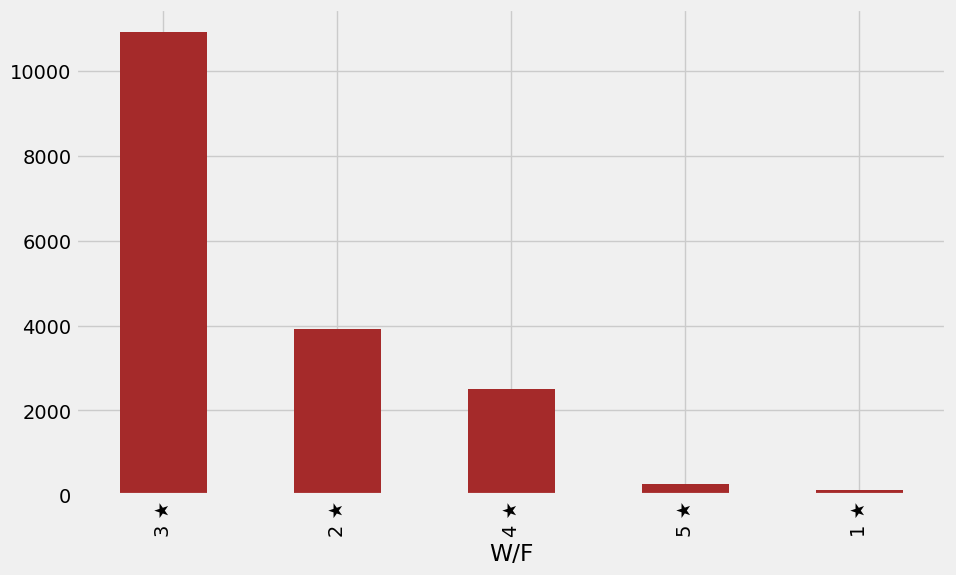

In [43]:
dataset['W/F'].value_counts().plot(kind='bar', figsize=(10, 6), color='brown')

In [44]:
dataset['W/F'] = dataset['W/F'].apply(lambda x: int(x[0]))

Converted the string to int and deleted the * char.

## SM

<Axes: xlabel='SM'>

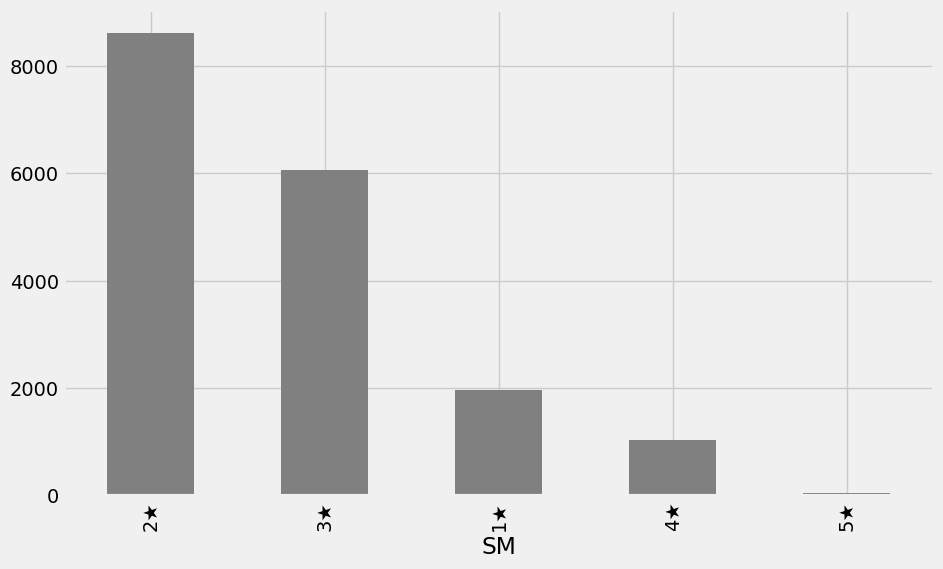

In [45]:
dataset['SM'].value_counts().plot(kind='bar', figsize=(10, 6), color='gray')

In [46]:
dataset['SM'] = dataset['SM'].apply(lambda x: int(x[0]))

## A/W

<Axes: xlabel='A/W'>

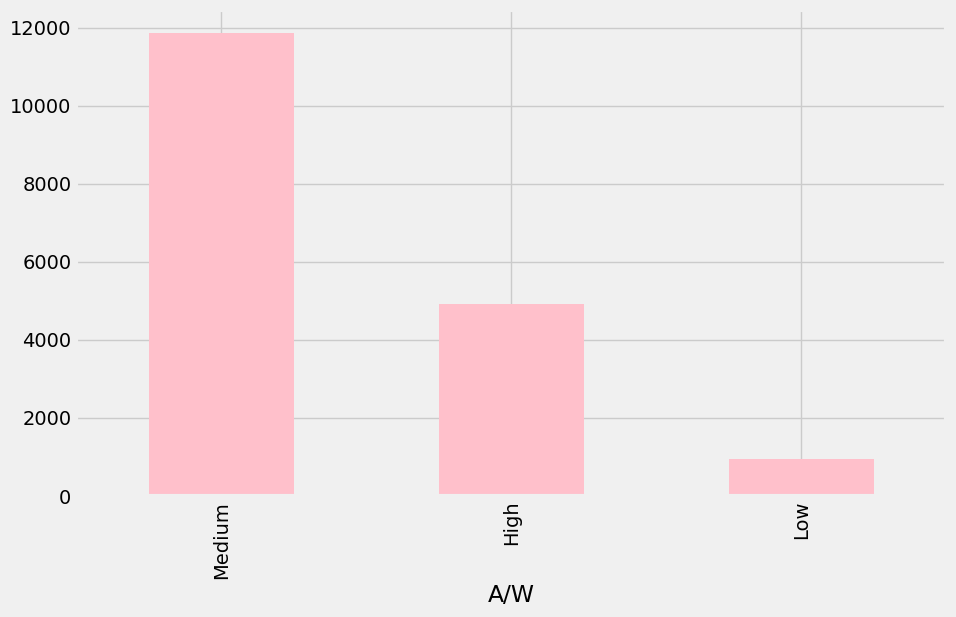

In [47]:
dataset['A/W'].value_counts().plot(kind='bar', figsize=(10, 6), color='pink')

In [48]:
# Perform one-hot encoding on the 'A/W' column
aw_encoded = pd.get_dummies(dataset['A/W'], prefix='A/W').astype(int)
# Concatenate the one-hot encoded columns to the dataset
dataset = pd.concat([dataset, aw_encoded], axis=1)
#drop the 'A/W' column
dataset = dataset.drop(columns=['A/W'])


## D/W

<Axes: xlabel='D/W'>

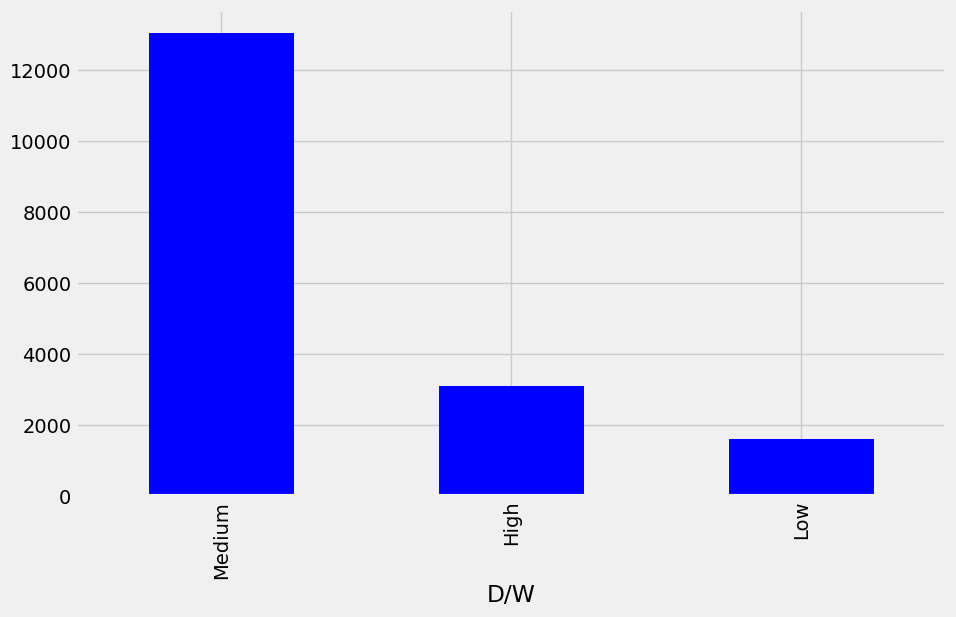

In [49]:
dataset['D/W'].value_counts().plot(kind='bar', figsize=(10, 6), color='blue')

In [50]:
# Perform one-hot encoding on the 'D/W' column
dw_encoded = pd.get_dummies(dataset['D/W'], prefix='D/W').astype(int)
# Concatenate the one-hot encoded columns to the dataset
dataset = pd.concat([dataset, dw_encoded], axis=1)
#drop the 'D/W' column
dataset = dataset.drop(columns=['D/W'])

## IR

<Axes: xlabel='IR'>

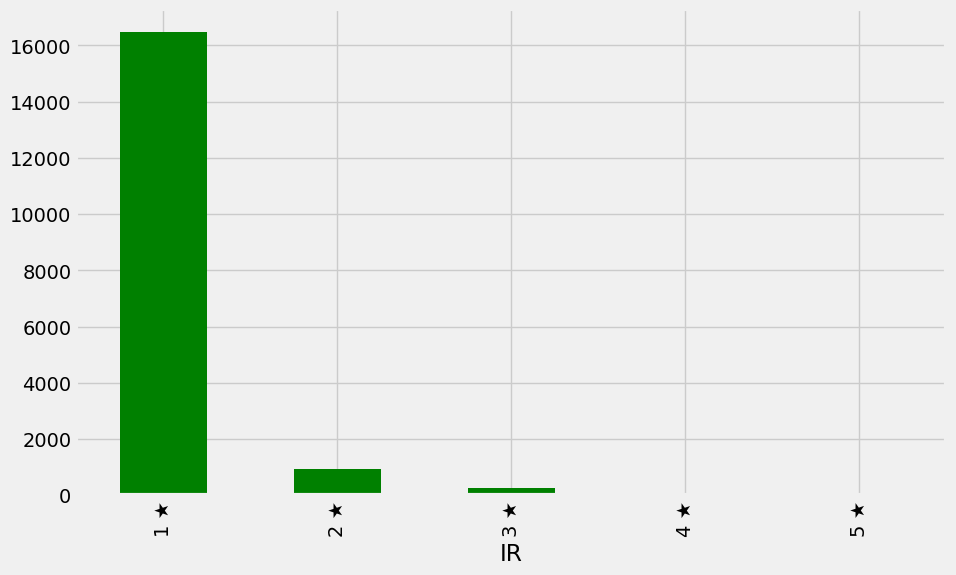

In [51]:
dataset['IR'].value_counts().plot(kind='bar', figsize=(10, 6), color='green')

In [52]:
dataset['IR'] = dataset['IR'].apply(lambda x: int(x[0]))

In [53]:
# print the object columns
obj_columns = dataset.select_dtypes(include=['object']).columns
print(obj_columns)

Index(['Joined'], dtype='object')


## Joined

In [55]:
dataset['Joined'].value_counts()

Joined
Jul 1, 2019     1248
Jul 1, 2018      779
Jan 1, 2019      669
Jul 1, 2017      458
Jan 1, 2020      430
                ... 
Sep 23, 2015       1
Apr 22, 2015       1
Jun 24, 2015       1
Jun 11, 2015       1
Mar 6, 2018        1
Name: count, Length: 1816, dtype: int64

In [56]:
dataset['Joined'] = pd.to_datetime(dataset['Joined'], format='%b %d, %Y', errors='coerce')

In [57]:
#check for Nan values
dataset['Joined'].isnull().sum() 


0

In [ ]:
Since this column ('Joined') contains string showing a date, it is converted to datetime type.

In [ ]:
## Check the final result

In [58]:
# save the cleaned dataset to a new csv file
dataset.to_csv('fifa_after_wrangling.csv', index=False)

In [ ]:
#check the type of dataset columns 
for i in dataset.dtypes:
    print(i)


In [ ]:
At the end of this step, as you can see we do not have any column with the type of 'object'. the type of the data we have now is completely aligned with any downstream machine learning task. We have only two category columns which are decided to remained as they are for the sake of simplicity. they can be easily converted to a desired type later for any downstream task. 

# Data Cleaning (Outliers Detection)

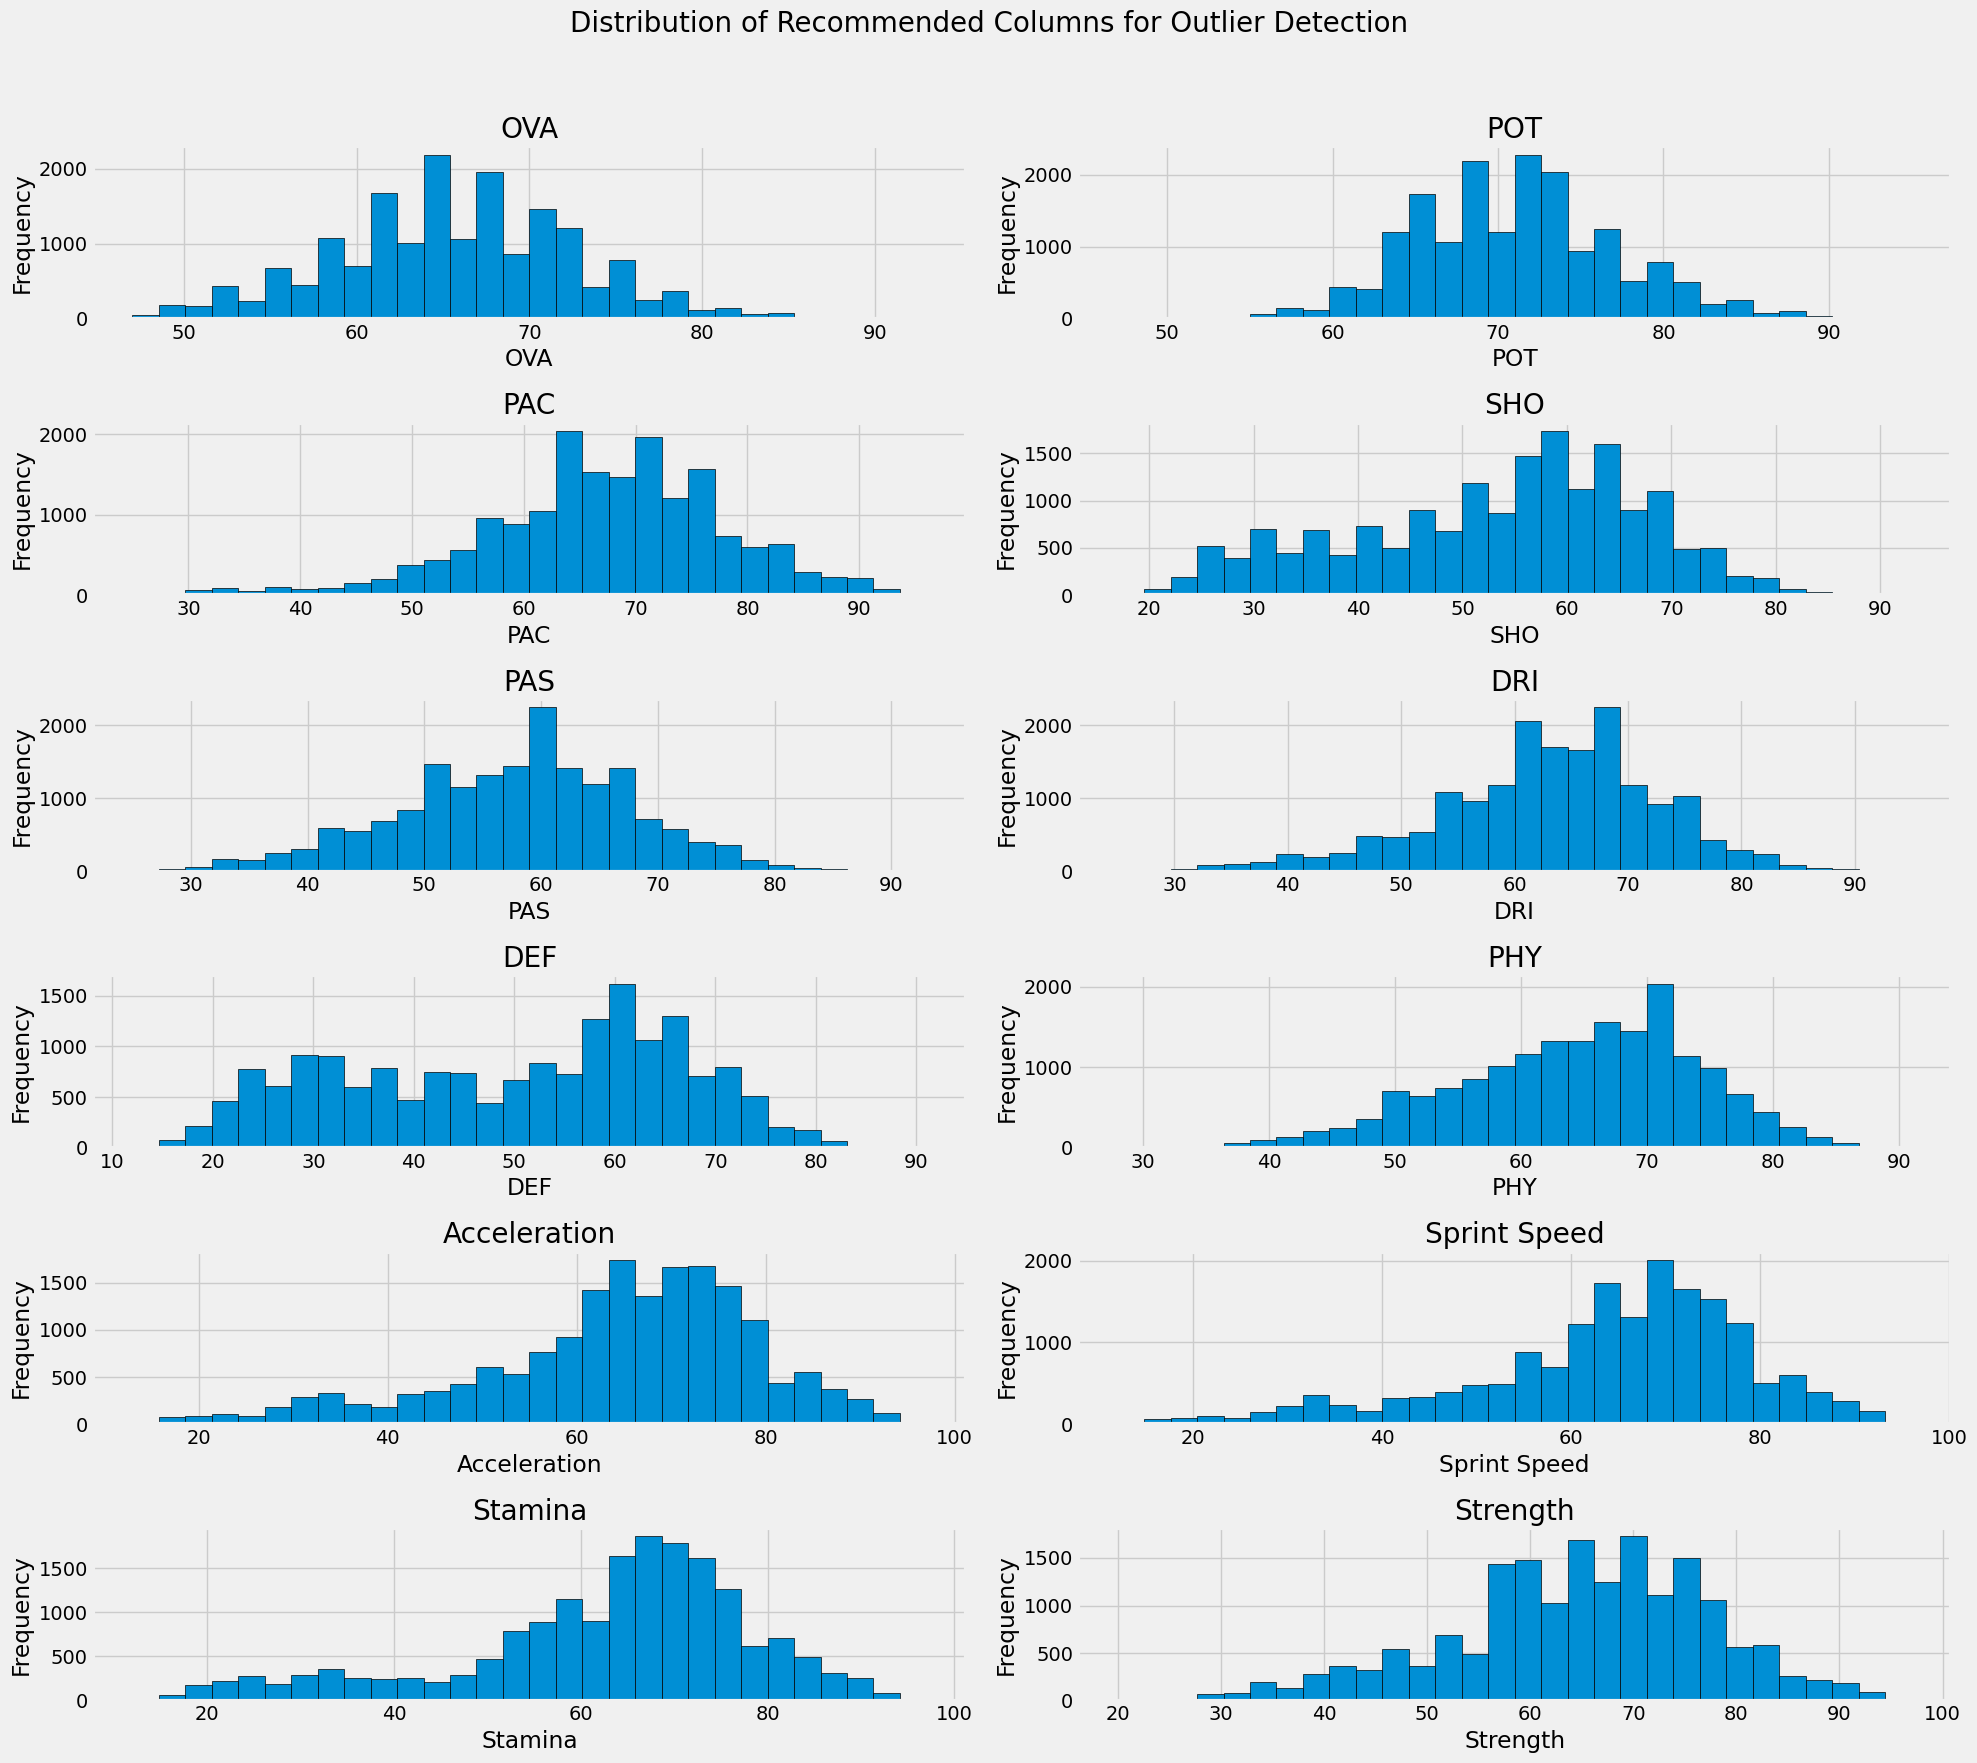

In [59]:
# Define the recommended columns for outlier detection
recommended_columns = [
     'OVA', 'POT', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
    'Acceleration', 'Sprint Speed', 'Stamina', 'Strength'
]

# Adjust the number of subplots based on the number of columns
num_columns = len(recommended_columns)
fig, axes = plt.subplots((num_columns + 1) // 2, 2, figsize=(20, num_columns * 1.5))
fig.suptitle('Distribution of Recommended Columns for Outlier Detection', fontsize=20)

# Loop through each column and plot
for ax, column in zip(axes.flatten(), recommended_columns):
    ax.hist(dataset[column].dropna(), bins=30, edgecolor='k')
    ax.set_title(f'{column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

for ax in axes.flatten()[len(recommended_columns):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [60]:
# Function to detect outliers using the IQR method
def find_outliers_iqr(data, columns):
    outlier_indices = {}
    for column in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find the indices of outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
        outlier_indices[column] = outliers.tolist()
    
    return outlier_indices

# Find outliers in the recommended columns
outliers_iqr = find_outliers_iqr(dataset, recommended_columns)

# Display the outliers to the user
import pandas as pd
outliers_summary = {col: len(outliers) for col, outliers in outliers_iqr.items()}
outliers_df = pd.DataFrame(list(outliers_summary.items()), columns=['Column', 'Number of Outliers'])

# Display the outliers summary using standard pandas display
outliers_df

Column  Number of Outliers
0            OVA                 156
1            POT                 151
2            PAC                 424
3            SHO                   0
4            PAS                 177
5            DRI                 426
6            DEF                   0
7            PHY                 109
8   Acceleration                 754
9   Sprint Speed                 683
10       Stamina                 840
11      Strength                 116

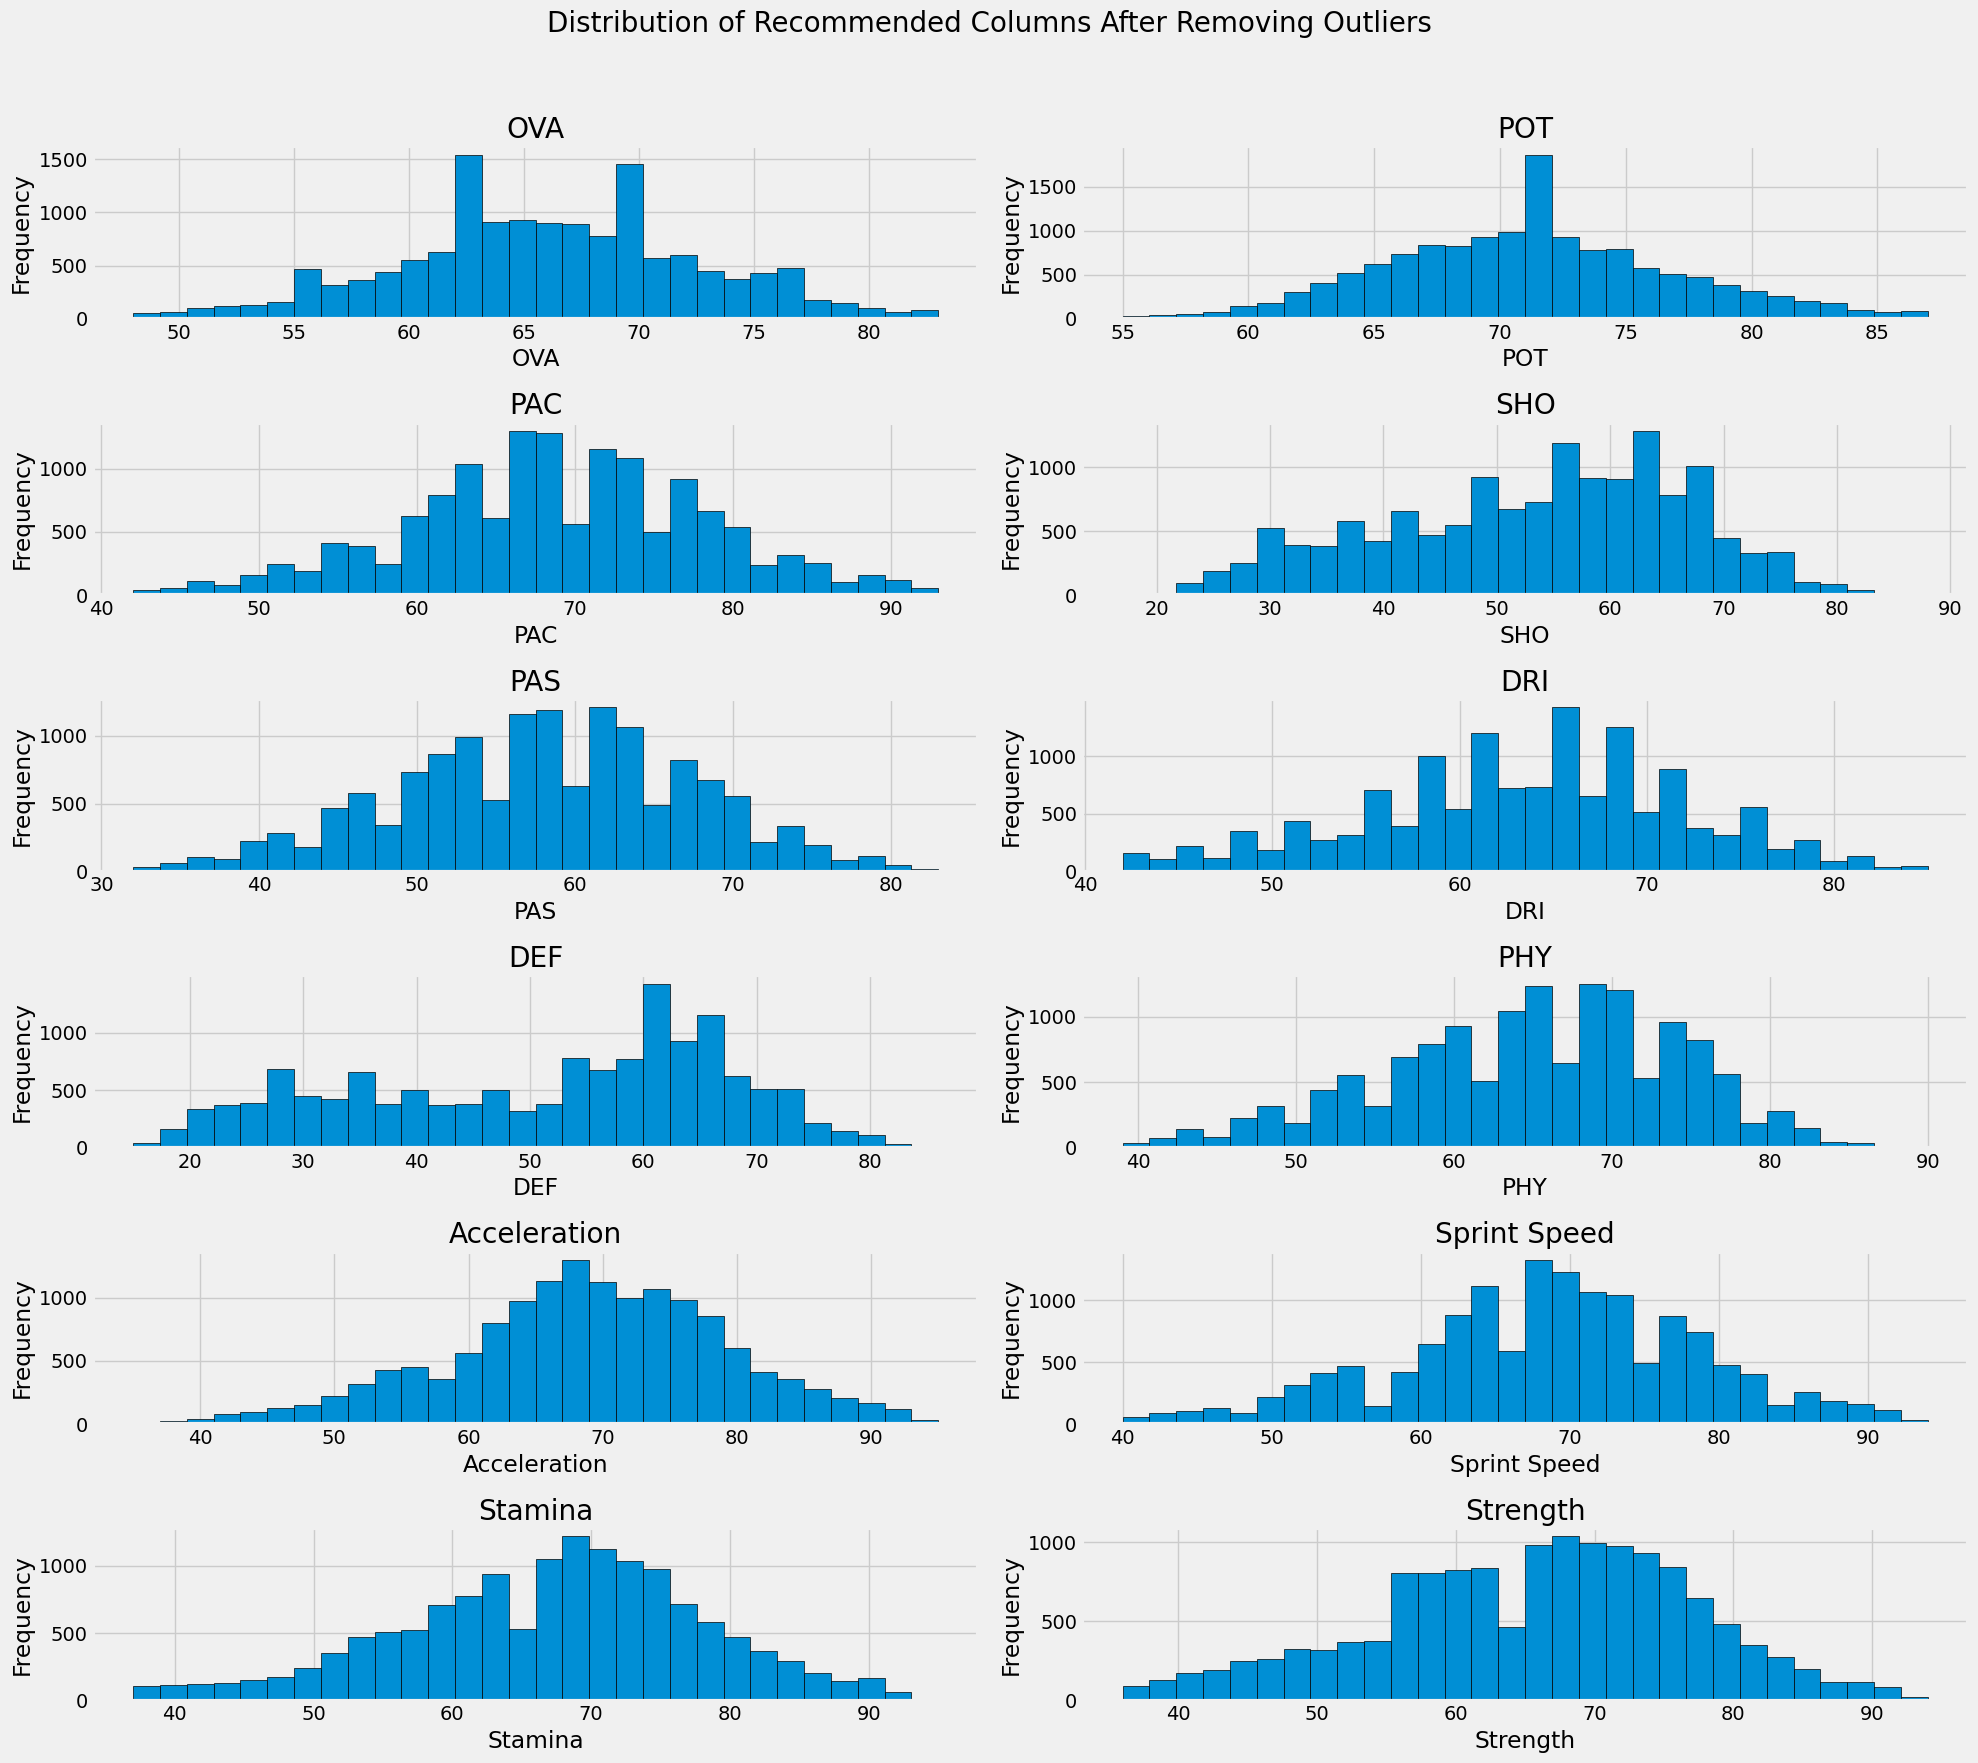

In [61]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(data, columns):
    for column in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return data

# Remove outliers from the recommended columns
cleaned_data = remove_outliers_iqr(dataset, recommended_columns)

# Plot the distribution of recommended columns after removing outliers
num_columns = len(recommended_columns)
fig, axes = plt.subplots((num_columns + 1) // 2, 2, figsize=(20, num_columns * 1.5))
fig.suptitle('Distribution of Recommended Columns After Removing Outliers', fontsize=20)

# Loop through each column and plot
for ax, column in zip(axes.flatten(), recommended_columns):
    ax.hist(cleaned_data[column].dropna(), bins=30, edgecolor='k')
    ax.set_title(f'{column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide any empty subplots
for ax in axes.flatten()[len(recommended_columns):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Age

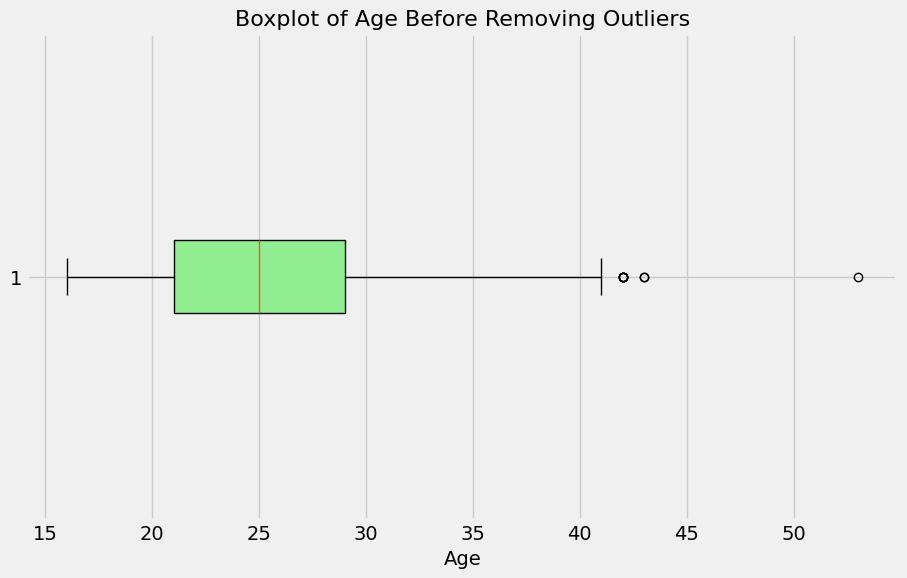

In [62]:
# Plot the boxplot for 'Age' before removing outliers
plt.figure(figsize=(10, 6))
plt.boxplot(dataset['Age'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title('Boxplot of Age Before Removing Outliers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.show()



The lower bound value is 11.052072037321608
The upper bound value is 39.446997284129125
Total number of outliers are 26


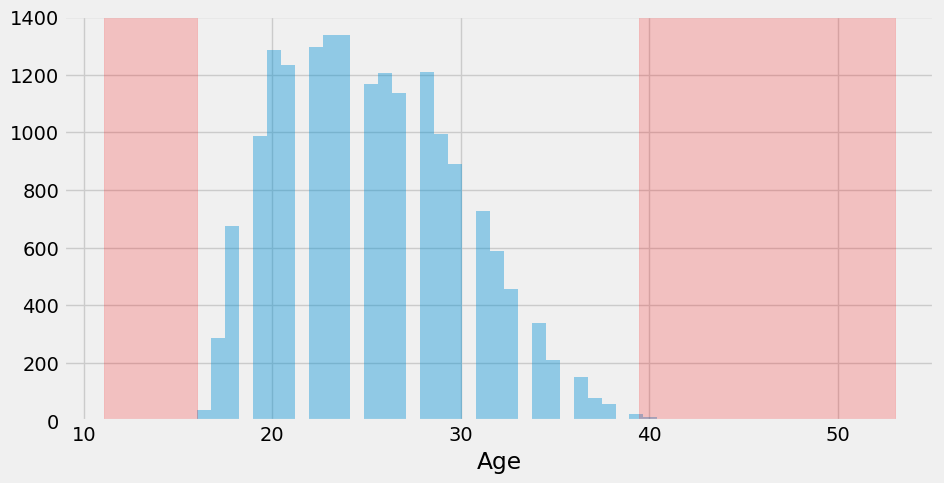

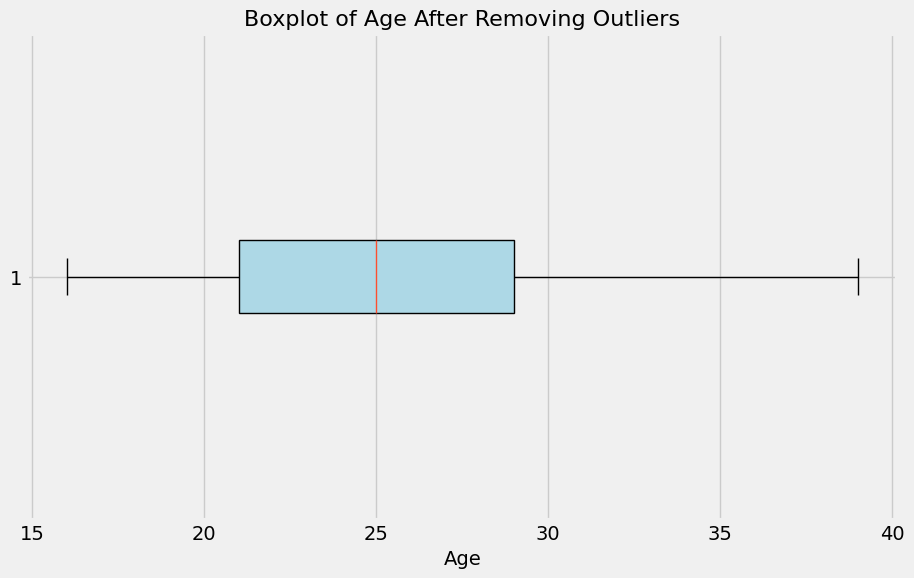

In [63]:

# Define the outlier detection function
def out_std(dataset, column):
    global lower, upper
    # Calculate the mean and standard deviation of the data frame
    data_mean, data_std = dataset[column].mean(), dataset[column].std()
    # Calculate the cutoff value
    cut_off = data_std * 3
    # Calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and upper bound value respectively
    df1 = dataset[dataset[column] > upper]
    df2 = dataset[dataset[column] < lower]
    print('Total number of outliers are', df1.shape[0] + df2.shape[0])
    # Remove outliers
    cleaned_data = dataset[(dataset[column] <= upper) & (dataset[column] >= lower)]
    return cleaned_data


cleaned_df = out_std(dataset, 'Age')

plt.figure(figsize = (10,5))
sns.distplot(dataset['Age'], kde=False)
plt.axvspan(xmin = upper,xmax= dataset['Age'].max(),alpha=0.2, color='red')
plt.axvspan(xmin = lower,xmax= dataset['Age'].min(),alpha=0.2, color='red')


    
# Plot the boxplot for 'Age' after removing outliers
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_df['Age'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Boxplot of Age After Removing Outliers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.show()




In [64]:
gk_columns_filtered = dataset.filter(regex='^GK')
gk_columns_filtered.describe()


GK Diving   GK Handling    GK Kicking  GK Positioning   GK Reflexes
count  17729.000000  17729.000000  17729.000000    17729.000000  17729.000000
mean      16.501326     16.296125     16.153083       16.308760     16.613289
std       17.645997     16.897265     16.569884       17.089199     17.940983
min        2.000000      2.000000      2.000000        2.000000      2.000000
25%        8.000000      8.000000      8.000000        8.000000      8.000000
50%       11.000000     11.000000     11.000000       11.000000     11.000000
75%       14.000000     14.000000     14.000000       14.000000     14.000000
max       90.000000     92.000000     93.000000       91.000000     90.000000

Considering that the maximum and minimum are all the same and they have almost the same average, it can be said that there are no outliers

In [65]:
# print categorical columns
categorical_columns = dataset.select_dtypes(include=["object"]).columns.tolist()
categorical_columns = categorical_columns[2:]
dataset[categorical_columns].head()


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [66]:
dataset['A/W'].unique()


KeyError: 'A/W'